# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 46kB/s  eta 0:00:01   27% |████████▊                       | 4.0MB 23.0MB/s eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

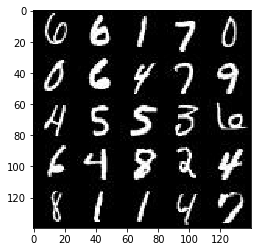

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

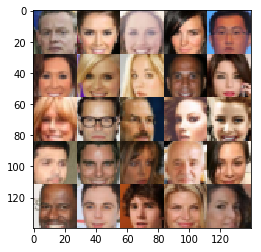

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels))
    input_z = tf.placeholder(tf.float32, (None, z_dim), name = 'z_dim')
    learning_rate = tf.placeholder(tf.float32,(None))
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [6]:
def discriminator(images, reuse=False, alpha = 0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        # to 14*14
        x_1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding = 'same')
        x_1 = tf.maximum(alpha*x_1, x_1)
        
        # to 7*7
        x_2 = tf.layers.conv2d(x_1, 128, 5, strides = 2, padding = 'same')
        x_2 = tf.layers.batch_normalization(x_2, training = True)
        x_2 = tf.maximum(alpha*x_2, x_2)
        
        # to 4*4
        x_3 = tf.layers.conv2d(x_2, 256, 5, strides = 2, padding = 'same')
        x_3 = tf.layers.batch_normalization(x_3, training = True)
        x_3 = tf.maximum(alpha*x_3, x_3)
        
        #x_4 = tf.layers.average_pooling2d(x_3, pool_size = 4, strides = 1, padding = 'valid')
        x_4 = tf.reshape(x_3, (-1,256*4*4))
        
        logits = tf.layers.dense(x_4,1)
        out = tf.nn.sigmoid(logits)
        
        return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope( "generator", reuse = not is_train):
        # First fully connected layer
        x_full = tf.layers.dense(z, 4*4*512)
        x_0 = tf.reshape(x_full, (-1,4,4,512))
        x_0 = tf.layers.batch_normalization(x_0, training = is_train)
        x_0 = tf.maximum(alpha*x_0, x_0)
        
        # 7*7
        x_1 = tf.layers.conv2d_transpose(x_0, 256, 4, strides = 1, padding = 'valid')
        x_1 = tf.layers.batch_normalization(x_1, training = is_train)
        x_1 = tf.maximum(alpha* x_1, x_1)
        
        # 14*14
        x_2 = tf.layers.conv2d_transpose(x_1, 128, 5, strides = 2, padding = 'same')
        x_2 = tf.layers.batch_normalization(x_2, training = is_train)
        x_2 = tf.maximum(alpha*x_2, x_2)
        
        #28*28
        logits = tf.layers.conv2d_transpose(x_2, out_channel_dim, 5, strides = 2, padding = 'same')
        
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, learning_rate = 0.0002, smooth = 0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    d_output_real, d_logit_real = discriminator(input_real)
    g_output = generator(input_z, out_channel_dim)
    d_output_fake, d_logit_fake = discriminator(g_output, reuse = True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logit_real, labels = tf.ones_like(d_output_real)*(1-smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logit_fake, labels = tf.zeros_like(d_output_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits = d_logit_fake, labels = tf.ones_like(d_output_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_opt = tf.train.AdamOptimizer(learning_rate,beta1 = beta1).minimize(d_loss, var_list = d_vars)
        g_opt = tf.train.AdamOptimizer(learning_rate,beta1 = beta1).minimize(g_loss, var_list = g_vars)
        return d_opt, g_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [15]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [19]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # Build Model
    input_real, input_z, lr = model_inputs(data_shape[1],data_shape[2],data_shape[3], z_dim)
    d_loss,g_loss = model_loss(input_real, input_z, data_shape[3])
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        print_loss = 0
        show_generator = 200
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                print_loss += 1
                z = np.random.uniform(-1,1,size =(batch_size, z_dim))
                # update weights
                sess.run(d_opt, feed_dict = {input_real: batch_images,
                                                     input_z: z,
                                                     lr: learning_rate})
                sess.run(g_opt, feed_dict = {input_z: z,
                                             lr:learning_rate,
                                             input_real: batch_images})
                
                # print loss every 10 batches
                if print_loss % 20 == 0:
                    train_d_loss = d_loss.eval({input_real: batch_images, input_z: z})
                    train_g_loss = g_loss.eval({input_z: z})
                    print('epoch:{} batch: {}, genarator loss:{:4f}, discriminator loss:{:4f}'.
                          format(epoch_i, print_loss, train_g_loss, train_d_loss))
                
                # show generator output
                if print_loss % show_generator == 0:
                    show_generator_output(sess, batch_size, input_z, data_shape[3], data_image_mode)

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

epoch:0 batch: 10, genarator loss:2.040328, discriminator loss:0.542080
epoch:0 batch: 20, genarator loss:3.452676, discriminator loss:0.376089
epoch:0 batch: 30, genarator loss:2.418956, discriminator loss:0.441421
epoch:0 batch: 40, genarator loss:17.602821, discriminator loss:0.433780
epoch:0 batch: 50, genarator loss:10.225800, discriminator loss:0.712103
epoch:0 batch: 60, genarator loss:10.630457, discriminator loss:1.134504
epoch:0 batch: 70, genarator loss:0.575330, discriminator loss:1.276171
epoch:0 batch: 80, genarator loss:7.430463, discriminator loss:0.590977
epoch:0 batch: 90, genarator loss:0.965443, discriminator loss:0.995948
epoch:0 batch: 100, genarator loss:2.900015, discriminator loss:0.472830


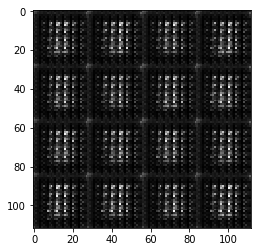

epoch:0 batch: 110, genarator loss:3.905557, discriminator loss:0.410138
epoch:0 batch: 120, genarator loss:1.596554, discriminator loss:0.635088
epoch:0 batch: 130, genarator loss:3.027503, discriminator loss:0.408492
epoch:0 batch: 140, genarator loss:2.789096, discriminator loss:0.451580
epoch:0 batch: 150, genarator loss:3.212376, discriminator loss:0.396580
epoch:0 batch: 160, genarator loss:4.119608, discriminator loss:0.371187
epoch:0 batch: 170, genarator loss:3.473252, discriminator loss:0.394308
epoch:0 batch: 180, genarator loss:2.912415, discriminator loss:0.431691
epoch:0 batch: 190, genarator loss:3.843958, discriminator loss:0.367091
epoch:0 batch: 200, genarator loss:2.684896, discriminator loss:0.443534


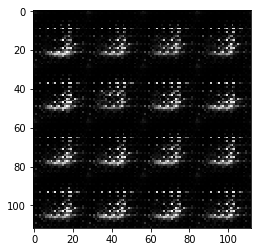

epoch:0 batch: 210, genarator loss:2.380062, discriminator loss:0.474473
epoch:0 batch: 220, genarator loss:3.359319, discriminator loss:0.400293
epoch:0 batch: 230, genarator loss:3.972869, discriminator loss:0.378608
epoch:0 batch: 240, genarator loss:2.549768, discriminator loss:0.485034
epoch:0 batch: 250, genarator loss:1.920704, discriminator loss:0.653034
epoch:0 batch: 260, genarator loss:2.142667, discriminator loss:1.353784
epoch:0 batch: 270, genarator loss:2.176462, discriminator loss:0.545984
epoch:0 batch: 280, genarator loss:0.934039, discriminator loss:0.931761
epoch:0 batch: 290, genarator loss:3.211729, discriminator loss:0.450786
epoch:0 batch: 300, genarator loss:2.369772, discriminator loss:0.488948


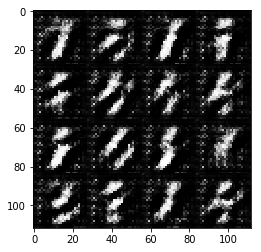

epoch:0 batch: 310, genarator loss:3.485872, discriminator loss:0.402823
epoch:0 batch: 320, genarator loss:2.734115, discriminator loss:0.465706
epoch:0 batch: 330, genarator loss:4.579434, discriminator loss:0.491517
epoch:0 batch: 340, genarator loss:2.438935, discriminator loss:0.449288
epoch:0 batch: 350, genarator loss:4.432307, discriminator loss:0.502139
epoch:0 batch: 360, genarator loss:3.153699, discriminator loss:0.386491
epoch:0 batch: 370, genarator loss:3.324399, discriminator loss:0.419091
epoch:0 batch: 380, genarator loss:3.752177, discriminator loss:0.439421
epoch:0 batch: 390, genarator loss:2.898462, discriminator loss:0.446318
epoch:0 batch: 400, genarator loss:4.303602, discriminator loss:0.390507


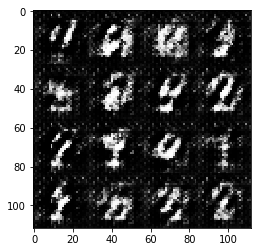

epoch:0 batch: 410, genarator loss:4.139005, discriminator loss:0.405757
epoch:0 batch: 420, genarator loss:3.317191, discriminator loss:0.384216
epoch:0 batch: 430, genarator loss:2.813351, discriminator loss:0.409549
epoch:0 batch: 440, genarator loss:2.446928, discriminator loss:0.443006
epoch:0 batch: 450, genarator loss:0.079324, discriminator loss:3.794870
epoch:0 batch: 460, genarator loss:1.973103, discriminator loss:0.573760
epoch:0 batch: 470, genarator loss:1.141652, discriminator loss:0.942307
epoch:0 batch: 480, genarator loss:3.954948, discriminator loss:1.307546
epoch:0 batch: 490, genarator loss:0.221785, discriminator loss:2.377927
epoch:0 batch: 500, genarator loss:4.316993, discriminator loss:0.852278


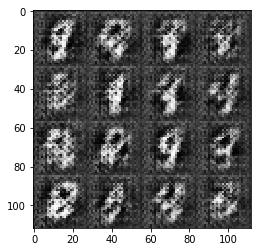

epoch:0 batch: 510, genarator loss:1.157313, discriminator loss:0.887464
epoch:0 batch: 520, genarator loss:3.409136, discriminator loss:0.425414
epoch:0 batch: 530, genarator loss:3.563782, discriminator loss:0.689708
epoch:0 batch: 540, genarator loss:0.281096, discriminator loss:1.870297
epoch:0 batch: 550, genarator loss:1.446675, discriminator loss:0.772441
epoch:0 batch: 560, genarator loss:1.586989, discriminator loss:0.695982
epoch:0 batch: 570, genarator loss:2.385432, discriminator loss:0.464247
epoch:0 batch: 580, genarator loss:1.942888, discriminator loss:0.534875
epoch:0 batch: 590, genarator loss:4.030513, discriminator loss:0.358684
epoch:0 batch: 600, genarator loss:1.395116, discriminator loss:0.706214


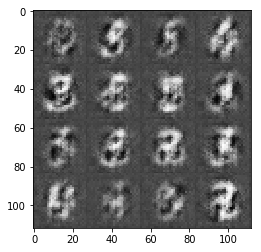

epoch:0 batch: 610, genarator loss:1.132258, discriminator loss:0.798133
epoch:0 batch: 620, genarator loss:1.641075, discriminator loss:0.632637
epoch:0 batch: 630, genarator loss:1.433766, discriminator loss:0.651574
epoch:0 batch: 640, genarator loss:3.003560, discriminator loss:0.480912
epoch:0 batch: 650, genarator loss:1.136741, discriminator loss:0.799359
epoch:0 batch: 660, genarator loss:1.392403, discriminator loss:0.716975
epoch:0 batch: 670, genarator loss:0.734838, discriminator loss:1.107418
epoch:0 batch: 680, genarator loss:2.450330, discriminator loss:0.484726
epoch:0 batch: 690, genarator loss:1.959856, discriminator loss:0.505301
epoch:0 batch: 700, genarator loss:2.938405, discriminator loss:0.405105


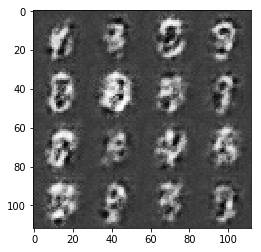

epoch:0 batch: 710, genarator loss:2.540901, discriminator loss:0.478950
epoch:0 batch: 720, genarator loss:2.384749, discriminator loss:0.439710
epoch:0 batch: 730, genarator loss:2.407166, discriminator loss:0.500783
epoch:0 batch: 740, genarator loss:2.381240, discriminator loss:0.499645
epoch:0 batch: 750, genarator loss:3.668548, discriminator loss:0.391520
epoch:0 batch: 760, genarator loss:2.235296, discriminator loss:0.484967
epoch:0 batch: 770, genarator loss:2.733843, discriminator loss:0.435325
epoch:0 batch: 780, genarator loss:3.203180, discriminator loss:0.408801
epoch:0 batch: 790, genarator loss:2.527978, discriminator loss:0.447681
epoch:0 batch: 800, genarator loss:2.653310, discriminator loss:0.426497


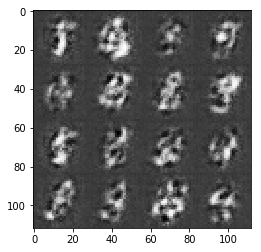

epoch:0 batch: 810, genarator loss:1.967795, discriminator loss:0.519500
epoch:0 batch: 820, genarator loss:2.309624, discriminator loss:0.458722
epoch:0 batch: 830, genarator loss:1.004939, discriminator loss:0.865088
epoch:0 batch: 840, genarator loss:1.700193, discriminator loss:0.575222
epoch:0 batch: 850, genarator loss:1.512322, discriminator loss:0.628559
epoch:0 batch: 860, genarator loss:1.621896, discriminator loss:0.569687
epoch:0 batch: 870, genarator loss:1.767615, discriminator loss:0.566540
epoch:0 batch: 880, genarator loss:1.009246, discriminator loss:0.945293
epoch:0 batch: 890, genarator loss:1.649165, discriminator loss:0.567871
epoch:0 batch: 900, genarator loss:3.064413, discriminator loss:0.393825


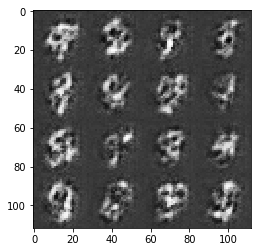

epoch:0 batch: 910, genarator loss:1.360594, discriminator loss:0.708579
epoch:0 batch: 920, genarator loss:1.850842, discriminator loss:0.631701
epoch:0 batch: 930, genarator loss:2.825734, discriminator loss:0.420743
epoch:0 batch: 940, genarator loss:2.456910, discriminator loss:0.465818
epoch:0 batch: 950, genarator loss:1.458563, discriminator loss:1.010305
epoch:0 batch: 960, genarator loss:1.932614, discriminator loss:0.540064
epoch:0 batch: 970, genarator loss:0.915047, discriminator loss:0.963529
epoch:0 batch: 980, genarator loss:1.798701, discriminator loss:0.542726
epoch:0 batch: 990, genarator loss:2.441283, discriminator loss:0.452009
epoch:0 batch: 1000, genarator loss:2.152303, discriminator loss:0.475002


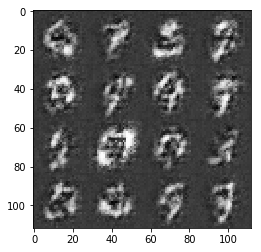

epoch:0 batch: 1010, genarator loss:2.208818, discriminator loss:0.470329
epoch:0 batch: 1020, genarator loss:1.869584, discriminator loss:0.578315
epoch:0 batch: 1030, genarator loss:3.321621, discriminator loss:0.385161
epoch:0 batch: 1040, genarator loss:2.057719, discriminator loss:0.493365
epoch:0 batch: 1050, genarator loss:1.834345, discriminator loss:0.552688
epoch:0 batch: 1060, genarator loss:2.514526, discriminator loss:0.443093
epoch:0 batch: 1070, genarator loss:2.548090, discriminator loss:0.423613
epoch:0 batch: 1080, genarator loss:3.625173, discriminator loss:0.368306
epoch:0 batch: 1090, genarator loss:3.346735, discriminator loss:0.376834
epoch:0 batch: 1100, genarator loss:2.650337, discriminator loss:0.425943


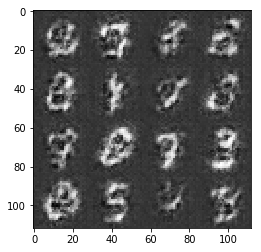

epoch:0 batch: 1110, genarator loss:3.279987, discriminator loss:0.408223
epoch:0 batch: 1120, genarator loss:2.671347, discriminator loss:0.418465
epoch:0 batch: 1130, genarator loss:2.291936, discriminator loss:0.471167
epoch:0 batch: 1140, genarator loss:2.310970, discriminator loss:0.477904
epoch:0 batch: 1150, genarator loss:3.717461, discriminator loss:0.386230
epoch:0 batch: 1160, genarator loss:2.401528, discriminator loss:0.453303
epoch:0 batch: 1170, genarator loss:4.733678, discriminator loss:0.361372
epoch:0 batch: 1180, genarator loss:2.667465, discriminator loss:0.414987
epoch:0 batch: 1190, genarator loss:2.580773, discriminator loss:0.445798
epoch:0 batch: 1200, genarator loss:2.328177, discriminator loss:0.461770


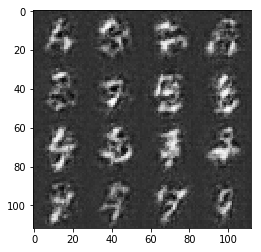

epoch:0 batch: 1210, genarator loss:3.536469, discriminator loss:1.261785
epoch:0 batch: 1220, genarator loss:2.086869, discriminator loss:0.659441
epoch:0 batch: 1230, genarator loss:3.044424, discriminator loss:0.701823
epoch:0 batch: 1240, genarator loss:0.489425, discriminator loss:1.380182
epoch:0 batch: 1250, genarator loss:2.782308, discriminator loss:0.514738
epoch:0 batch: 1260, genarator loss:1.794899, discriminator loss:0.535649
epoch:0 batch: 1270, genarator loss:1.948209, discriminator loss:0.525514
epoch:0 batch: 1280, genarator loss:1.485558, discriminator loss:0.642348
epoch:0 batch: 1290, genarator loss:1.687346, discriminator loss:0.564143
epoch:0 batch: 1300, genarator loss:2.055618, discriminator loss:0.490529


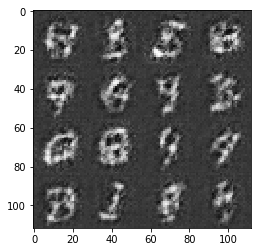

epoch:0 batch: 1310, genarator loss:2.399887, discriminator loss:0.439207
epoch:0 batch: 1320, genarator loss:3.052939, discriminator loss:0.386045
epoch:0 batch: 1330, genarator loss:3.310809, discriminator loss:0.401631
epoch:0 batch: 1340, genarator loss:5.288594, discriminator loss:0.367501
epoch:0 batch: 1350, genarator loss:2.056854, discriminator loss:0.501791
epoch:0 batch: 1360, genarator loss:0.931957, discriminator loss:1.102020
epoch:0 batch: 1370, genarator loss:2.457999, discriminator loss:0.443572
epoch:0 batch: 1380, genarator loss:3.590817, discriminator loss:0.401266
epoch:0 batch: 1390, genarator loss:3.272690, discriminator loss:0.396680
epoch:0 batch: 1400, genarator loss:3.379546, discriminator loss:0.371717


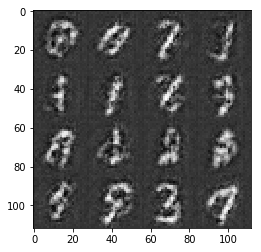

epoch:0 batch: 1410, genarator loss:1.200196, discriminator loss:0.752274
epoch:0 batch: 1420, genarator loss:2.539295, discriminator loss:0.470138
epoch:0 batch: 1430, genarator loss:1.762438, discriminator loss:0.578588
epoch:0 batch: 1440, genarator loss:1.644192, discriminator loss:0.721990
epoch:0 batch: 1450, genarator loss:2.189276, discriminator loss:0.479115
epoch:0 batch: 1460, genarator loss:2.345127, discriminator loss:0.466690
epoch:0 batch: 1470, genarator loss:2.833189, discriminator loss:0.397554
epoch:0 batch: 1480, genarator loss:2.619228, discriminator loss:0.419539
epoch:0 batch: 1490, genarator loss:4.470696, discriminator loss:0.565208
epoch:0 batch: 1500, genarator loss:4.063622, discriminator loss:0.461378


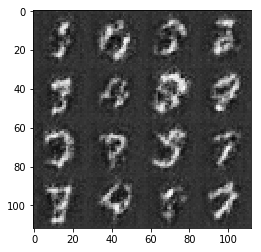

epoch:0 batch: 1510, genarator loss:2.315485, discriminator loss:0.462697
epoch:0 batch: 1520, genarator loss:2.124649, discriminator loss:0.475776
epoch:0 batch: 1530, genarator loss:3.318616, discriminator loss:0.391700
epoch:0 batch: 1540, genarator loss:1.800580, discriminator loss:0.527316
epoch:0 batch: 1550, genarator loss:3.256925, discriminator loss:0.374633
epoch:0 batch: 1560, genarator loss:3.846302, discriminator loss:0.370833
epoch:0 batch: 1570, genarator loss:2.521323, discriminator loss:0.439368
epoch:0 batch: 1580, genarator loss:3.269095, discriminator loss:0.375097
epoch:0 batch: 1590, genarator loss:3.247949, discriminator loss:0.377452
epoch:0 batch: 1600, genarator loss:1.612759, discriminator loss:0.607067


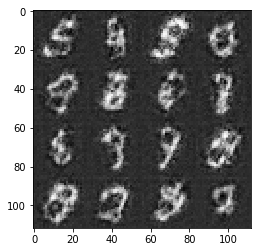

epoch:0 batch: 1610, genarator loss:3.350151, discriminator loss:0.410411
epoch:0 batch: 1620, genarator loss:1.494778, discriminator loss:0.715779
epoch:0 batch: 1630, genarator loss:2.774715, discriminator loss:0.438731
epoch:0 batch: 1640, genarator loss:3.691487, discriminator loss:0.366185
epoch:0 batch: 1650, genarator loss:3.321966, discriminator loss:0.384748
epoch:0 batch: 1660, genarator loss:3.093907, discriminator loss:0.384169
epoch:0 batch: 1670, genarator loss:1.877054, discriminator loss:0.553130
epoch:0 batch: 1680, genarator loss:2.286360, discriminator loss:0.449904
epoch:0 batch: 1690, genarator loss:2.692969, discriminator loss:0.413845
epoch:0 batch: 1700, genarator loss:3.272287, discriminator loss:0.389290


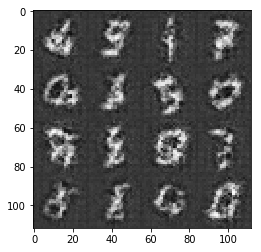

epoch:0 batch: 1710, genarator loss:3.093603, discriminator loss:0.384100
epoch:0 batch: 1720, genarator loss:4.922986, discriminator loss:1.437403
epoch:0 batch: 1730, genarator loss:1.600118, discriminator loss:0.700888
epoch:0 batch: 1740, genarator loss:3.158353, discriminator loss:0.452652
epoch:0 batch: 1750, genarator loss:1.944050, discriminator loss:0.537782
epoch:0 batch: 1760, genarator loss:1.459691, discriminator loss:0.647637
epoch:0 batch: 1770, genarator loss:1.955766, discriminator loss:0.513242
epoch:0 batch: 1780, genarator loss:2.632402, discriminator loss:0.428671
epoch:0 batch: 1790, genarator loss:2.406580, discriminator loss:0.447059
epoch:0 batch: 1800, genarator loss:2.804168, discriminator loss:0.404497


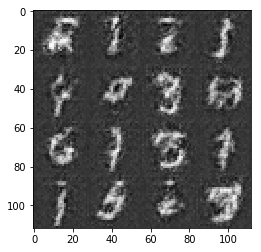

epoch:0 batch: 1810, genarator loss:2.994930, discriminator loss:0.398576
epoch:0 batch: 1820, genarator loss:4.216434, discriminator loss:0.348406
epoch:0 batch: 1830, genarator loss:3.755067, discriminator loss:0.391050
epoch:0 batch: 1840, genarator loss:2.892681, discriminator loss:0.401253
epoch:0 batch: 1850, genarator loss:1.982814, discriminator loss:0.517913
epoch:0 batch: 1860, genarator loss:1.693279, discriminator loss:0.604746
epoch:0 batch: 1870, genarator loss:2.873631, discriminator loss:0.403061
epoch:0 batch: 1880, genarator loss:2.894129, discriminator loss:0.393802
epoch:0 batch: 1890, genarator loss:3.657848, discriminator loss:0.368377
epoch:0 batch: 1900, genarator loss:2.873624, discriminator loss:0.404026


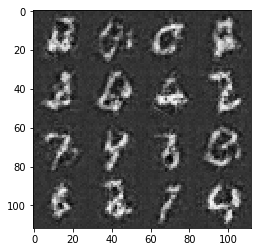

epoch:0 batch: 1910, genarator loss:3.605339, discriminator loss:0.365872
epoch:0 batch: 1920, genarator loss:3.415607, discriminator loss:0.370237
epoch:0 batch: 1930, genarator loss:3.545239, discriminator loss:0.411875
epoch:0 batch: 1940, genarator loss:1.789740, discriminator loss:0.709124
epoch:0 batch: 1950, genarator loss:2.476633, discriminator loss:0.973917
epoch:0 batch: 1960, genarator loss:1.204276, discriminator loss:0.743542
epoch:0 batch: 1970, genarator loss:0.589779, discriminator loss:1.314674
epoch:0 batch: 1980, genarator loss:2.422134, discriminator loss:0.494024
epoch:0 batch: 1990, genarator loss:1.850848, discriminator loss:0.547347
epoch:0 batch: 2000, genarator loss:2.590279, discriminator loss:0.456301


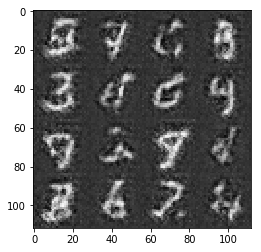

epoch:0 batch: 2010, genarator loss:1.159234, discriminator loss:0.839045
epoch:0 batch: 2020, genarator loss:2.303446, discriminator loss:0.456329
epoch:0 batch: 2030, genarator loss:2.446334, discriminator loss:0.495725
epoch:0 batch: 2040, genarator loss:3.723654, discriminator loss:0.382459
epoch:0 batch: 2050, genarator loss:1.936188, discriminator loss:0.529396
epoch:0 batch: 2060, genarator loss:2.667094, discriminator loss:0.459105
epoch:0 batch: 2070, genarator loss:2.795631, discriminator loss:0.412201
epoch:0 batch: 2080, genarator loss:2.233477, discriminator loss:0.455013
epoch:0 batch: 2090, genarator loss:3.694772, discriminator loss:0.377098
epoch:0 batch: 2100, genarator loss:3.331907, discriminator loss:0.373991


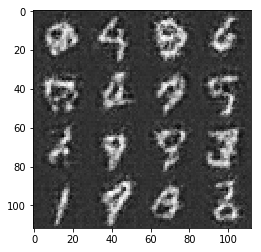

epoch:0 batch: 2110, genarator loss:2.420684, discriminator loss:0.437915
epoch:0 batch: 2120, genarator loss:2.919825, discriminator loss:0.396826
epoch:0 batch: 2130, genarator loss:2.518228, discriminator loss:0.424933
epoch:0 batch: 2140, genarator loss:3.631797, discriminator loss:0.396661
epoch:0 batch: 2150, genarator loss:2.253747, discriminator loss:0.467246
epoch:0 batch: 2160, genarator loss:2.813106, discriminator loss:0.405593
epoch:0 batch: 2170, genarator loss:3.762116, discriminator loss:0.367945
epoch:0 batch: 2180, genarator loss:2.488498, discriminator loss:0.437261
epoch:0 batch: 2190, genarator loss:4.301851, discriminator loss:0.351527
epoch:0 batch: 2200, genarator loss:2.550173, discriminator loss:0.424157


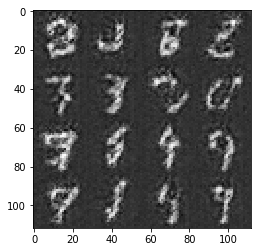

epoch:0 batch: 2210, genarator loss:2.913134, discriminator loss:0.397825
epoch:0 batch: 2220, genarator loss:3.308122, discriminator loss:0.665448
epoch:0 batch: 2230, genarator loss:3.073729, discriminator loss:0.384401
epoch:0 batch: 2240, genarator loss:0.347886, discriminator loss:1.951034
epoch:0 batch: 2250, genarator loss:1.637371, discriminator loss:0.688255
epoch:0 batch: 2260, genarator loss:3.002540, discriminator loss:0.422042
epoch:0 batch: 2270, genarator loss:3.414575, discriminator loss:0.425568
epoch:0 batch: 2280, genarator loss:2.480006, discriminator loss:0.445674
epoch:0 batch: 2290, genarator loss:1.876042, discriminator loss:0.534472
epoch:0 batch: 2300, genarator loss:2.528315, discriminator loss:0.465163


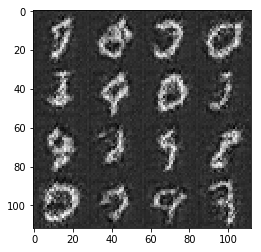

epoch:0 batch: 2310, genarator loss:4.697323, discriminator loss:0.353557
epoch:0 batch: 2320, genarator loss:2.681083, discriminator loss:0.413216
epoch:0 batch: 2330, genarator loss:1.798024, discriminator loss:0.604882
epoch:0 batch: 2340, genarator loss:2.815109, discriminator loss:0.409669
epoch:0 batch: 2350, genarator loss:2.096730, discriminator loss:0.499069
epoch:0 batch: 2360, genarator loss:3.719101, discriminator loss:0.369815
epoch:0 batch: 2370, genarator loss:3.310943, discriminator loss:0.373411
epoch:0 batch: 2380, genarator loss:3.110379, discriminator loss:0.397789
epoch:0 batch: 2390, genarator loss:3.312140, discriminator loss:0.379783
epoch:0 batch: 2400, genarator loss:2.839667, discriminator loss:0.407048


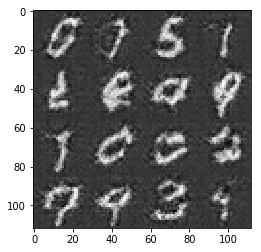

epoch:0 batch: 2410, genarator loss:1.945719, discriminator loss:0.510779
epoch:0 batch: 2420, genarator loss:2.836038, discriminator loss:0.447132
epoch:0 batch: 2430, genarator loss:3.253280, discriminator loss:0.400911
epoch:0 batch: 2440, genarator loss:1.974224, discriminator loss:0.492544
epoch:0 batch: 2450, genarator loss:2.365456, discriminator loss:0.460480
epoch:0 batch: 2460, genarator loss:1.081304, discriminator loss:0.828216
epoch:0 batch: 2470, genarator loss:2.470467, discriminator loss:1.034471
epoch:0 batch: 2480, genarator loss:1.689787, discriminator loss:0.625235
epoch:0 batch: 2490, genarator loss:0.997145, discriminator loss:0.842192
epoch:0 batch: 2500, genarator loss:1.157150, discriminator loss:0.778952


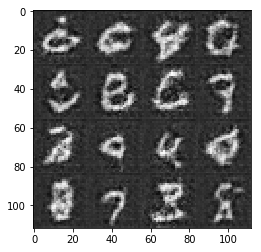

epoch:0 batch: 2510, genarator loss:2.148394, discriminator loss:0.472581
epoch:0 batch: 2520, genarator loss:1.763435, discriminator loss:0.572682
epoch:0 batch: 2530, genarator loss:1.140658, discriminator loss:0.800203
epoch:0 batch: 2540, genarator loss:1.728387, discriminator loss:0.547915
epoch:0 batch: 2550, genarator loss:2.342484, discriminator loss:0.460238
epoch:0 batch: 2560, genarator loss:1.988773, discriminator loss:0.510963
epoch:0 batch: 2570, genarator loss:3.142880, discriminator loss:0.398255
epoch:0 batch: 2580, genarator loss:3.052762, discriminator loss:0.381087
epoch:0 batch: 2590, genarator loss:0.638170, discriminator loss:1.183035
epoch:0 batch: 2600, genarator loss:2.449541, discriminator loss:0.440975


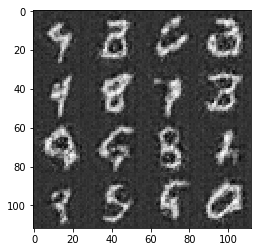

epoch:0 batch: 2610, genarator loss:2.809083, discriminator loss:0.400835
epoch:0 batch: 2620, genarator loss:2.908002, discriminator loss:0.401821
epoch:0 batch: 2630, genarator loss:1.827827, discriminator loss:0.549793
epoch:0 batch: 2640, genarator loss:2.161518, discriminator loss:0.498230
epoch:0 batch: 2650, genarator loss:4.102770, discriminator loss:0.366316
epoch:0 batch: 2660, genarator loss:2.429526, discriminator loss:0.435888
epoch:0 batch: 2670, genarator loss:2.949663, discriminator loss:0.389472
epoch:0 batch: 2680, genarator loss:4.427223, discriminator loss:0.350740
epoch:0 batch: 2690, genarator loss:3.940936, discriminator loss:0.408673
epoch:0 batch: 2700, genarator loss:1.627943, discriminator loss:0.669399


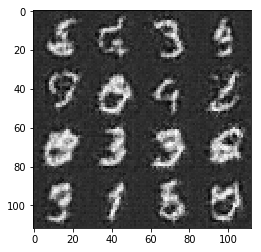

epoch:0 batch: 2710, genarator loss:3.577298, discriminator loss:0.451453
epoch:0 batch: 2720, genarator loss:1.566761, discriminator loss:0.602562
epoch:0 batch: 2730, genarator loss:4.368764, discriminator loss:0.355555
epoch:0 batch: 2740, genarator loss:2.281490, discriminator loss:0.457945
epoch:0 batch: 2750, genarator loss:1.997128, discriminator loss:0.522128
epoch:0 batch: 2760, genarator loss:1.568021, discriminator loss:0.722068
epoch:0 batch: 2770, genarator loss:2.479495, discriminator loss:0.558189
epoch:0 batch: 2780, genarator loss:1.079603, discriminator loss:0.848472
epoch:0 batch: 2790, genarator loss:1.120227, discriminator loss:0.865703
epoch:0 batch: 2800, genarator loss:2.199360, discriminator loss:0.482178


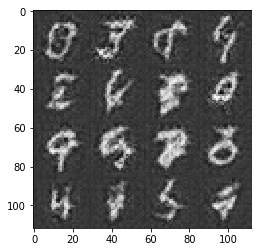

epoch:0 batch: 2810, genarator loss:2.211858, discriminator loss:0.522849
epoch:0 batch: 2820, genarator loss:2.610932, discriminator loss:0.451172
epoch:0 batch: 2830, genarator loss:1.530565, discriminator loss:0.698641
epoch:0 batch: 2840, genarator loss:2.738650, discriminator loss:0.424381
epoch:0 batch: 2850, genarator loss:1.009412, discriminator loss:0.877774
epoch:0 batch: 2860, genarator loss:0.856750, discriminator loss:1.071924
epoch:0 batch: 2870, genarator loss:3.089298, discriminator loss:0.473926
epoch:0 batch: 2880, genarator loss:3.475540, discriminator loss:0.369735
epoch:0 batch: 2890, genarator loss:3.523867, discriminator loss:0.378707
epoch:0 batch: 2900, genarator loss:3.053072, discriminator loss:0.383556


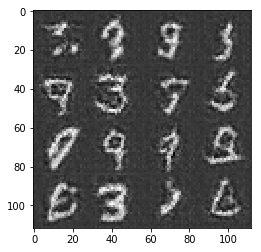

epoch:0 batch: 2910, genarator loss:2.966656, discriminator loss:0.397922
epoch:0 batch: 2920, genarator loss:1.826619, discriminator loss:0.538671
epoch:0 batch: 2930, genarator loss:2.813938, discriminator loss:0.446781
epoch:0 batch: 2940, genarator loss:3.209342, discriminator loss:0.393327
epoch:0 batch: 2950, genarator loss:2.467003, discriminator loss:0.441893
epoch:0 batch: 2960, genarator loss:2.867029, discriminator loss:0.400098
epoch:0 batch: 2970, genarator loss:3.216146, discriminator loss:0.383065
epoch:0 batch: 2980, genarator loss:4.857016, discriminator loss:0.341490
epoch:0 batch: 2990, genarator loss:4.067064, discriminator loss:0.353501
epoch:0 batch: 3000, genarator loss:3.014401, discriminator loss:0.396087


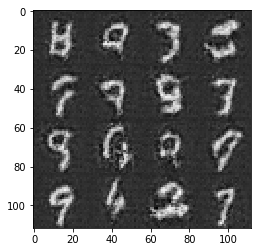

epoch:0 batch: 3010, genarator loss:2.785018, discriminator loss:0.400934
epoch:0 batch: 3020, genarator loss:4.116039, discriminator loss:0.355008
epoch:0 batch: 3030, genarator loss:1.010400, discriminator loss:0.874615
epoch:0 batch: 3040, genarator loss:1.682164, discriminator loss:0.848328
epoch:0 batch: 3050, genarator loss:1.478567, discriminator loss:0.699465
epoch:0 batch: 3060, genarator loss:2.796185, discriminator loss:0.492633
epoch:0 batch: 3070, genarator loss:1.756022, discriminator loss:0.578792
epoch:0 batch: 3080, genarator loss:2.010319, discriminator loss:0.505619
epoch:0 batch: 3090, genarator loss:1.071678, discriminator loss:0.902065
epoch:0 batch: 3100, genarator loss:2.921111, discriminator loss:0.421239


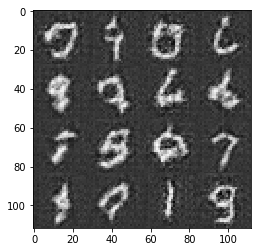

epoch:0 batch: 3110, genarator loss:1.600287, discriminator loss:0.591604
epoch:0 batch: 3120, genarator loss:2.142974, discriminator loss:0.501561
epoch:0 batch: 3130, genarator loss:1.894804, discriminator loss:0.523287
epoch:0 batch: 3140, genarator loss:1.586713, discriminator loss:0.617515
epoch:0 batch: 3150, genarator loss:3.752957, discriminator loss:0.377712
epoch:0 batch: 3160, genarator loss:3.039432, discriminator loss:0.413775
epoch:0 batch: 3170, genarator loss:2.312444, discriminator loss:0.451646
epoch:0 batch: 3180, genarator loss:3.796428, discriminator loss:0.368341
epoch:0 batch: 3190, genarator loss:1.906294, discriminator loss:0.523890
epoch:0 batch: 3200, genarator loss:3.889727, discriminator loss:0.360035


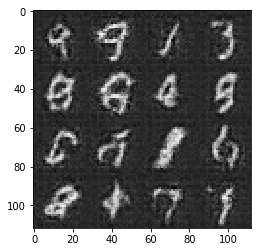

epoch:0 batch: 3210, genarator loss:2.277242, discriminator loss:0.456598
epoch:0 batch: 3220, genarator loss:1.051321, discriminator loss:0.929742
epoch:0 batch: 3230, genarator loss:3.270431, discriminator loss:0.556099
epoch:0 batch: 3240, genarator loss:2.545763, discriminator loss:0.423765
epoch:0 batch: 3250, genarator loss:2.502159, discriminator loss:0.433361
epoch:0 batch: 3260, genarator loss:2.949306, discriminator loss:0.412853
epoch:0 batch: 3270, genarator loss:2.228204, discriminator loss:0.474952
epoch:0 batch: 3280, genarator loss:2.257828, discriminator loss:0.459734
epoch:0 batch: 3290, genarator loss:2.735241, discriminator loss:0.436236
epoch:0 batch: 3300, genarator loss:4.004014, discriminator loss:1.218235


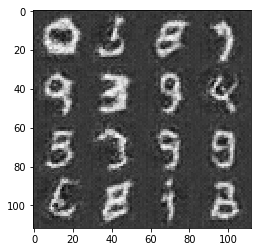

epoch:0 batch: 3310, genarator loss:1.031310, discriminator loss:0.842255
epoch:0 batch: 3320, genarator loss:2.289113, discriminator loss:0.460537
epoch:0 batch: 3330, genarator loss:2.601410, discriminator loss:0.438074
epoch:0 batch: 3340, genarator loss:1.648791, discriminator loss:0.635569
epoch:0 batch: 3350, genarator loss:3.163254, discriminator loss:0.406473
epoch:0 batch: 3360, genarator loss:0.472723, discriminator loss:1.696314
epoch:0 batch: 3370, genarator loss:1.751473, discriminator loss:0.561293
epoch:0 batch: 3380, genarator loss:2.712952, discriminator loss:0.440943
epoch:0 batch: 3390, genarator loss:3.038325, discriminator loss:0.400168
epoch:0 batch: 3400, genarator loss:3.051980, discriminator loss:0.388132


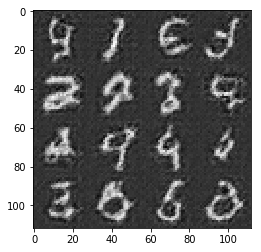

epoch:0 batch: 3410, genarator loss:4.042191, discriminator loss:0.390327
epoch:0 batch: 3420, genarator loss:1.747128, discriminator loss:0.715611
epoch:0 batch: 3430, genarator loss:2.875191, discriminator loss:0.401418
epoch:0 batch: 3440, genarator loss:2.276491, discriminator loss:0.468267
epoch:0 batch: 3450, genarator loss:2.006485, discriminator loss:0.491650
epoch:0 batch: 3460, genarator loss:3.418914, discriminator loss:0.376983
epoch:0 batch: 3470, genarator loss:2.986362, discriminator loss:0.397122
epoch:0 batch: 3480, genarator loss:4.193773, discriminator loss:0.361859
epoch:0 batch: 3490, genarator loss:2.575580, discriminator loss:0.425512
epoch:0 batch: 3500, genarator loss:2.030258, discriminator loss:0.491971


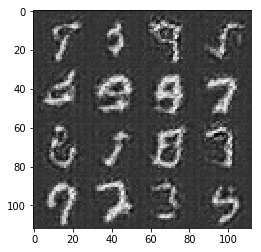

epoch:0 batch: 3510, genarator loss:2.888448, discriminator loss:0.401536
epoch:0 batch: 3520, genarator loss:3.477293, discriminator loss:0.394031
epoch:0 batch: 3530, genarator loss:4.445750, discriminator loss:0.344829
epoch:0 batch: 3540, genarator loss:2.266236, discriminator loss:0.499331
epoch:0 batch: 3550, genarator loss:2.985416, discriminator loss:0.401040
epoch:0 batch: 3560, genarator loss:2.922372, discriminator loss:0.402017
epoch:0 batch: 3570, genarator loss:3.124618, discriminator loss:0.386034
epoch:0 batch: 3580, genarator loss:2.110990, discriminator loss:0.474071
epoch:0 batch: 3590, genarator loss:1.706898, discriminator loss:0.555827
epoch:0 batch: 3600, genarator loss:3.707104, discriminator loss:0.526794


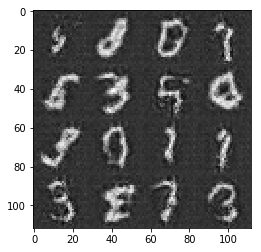

epoch:0 batch: 3610, genarator loss:1.506537, discriminator loss:0.637411
epoch:0 batch: 3620, genarator loss:1.276419, discriminator loss:0.733766
epoch:0 batch: 3630, genarator loss:1.894404, discriminator loss:0.529511
epoch:0 batch: 3640, genarator loss:1.560700, discriminator loss:0.652384
epoch:0 batch: 3650, genarator loss:1.673466, discriminator loss:0.621939
epoch:0 batch: 3660, genarator loss:2.355045, discriminator loss:0.446486
epoch:0 batch: 3670, genarator loss:3.011704, discriminator loss:0.390338
epoch:0 batch: 3680, genarator loss:1.375057, discriminator loss:0.679017
epoch:0 batch: 3690, genarator loss:2.449627, discriminator loss:0.434761
epoch:0 batch: 3700, genarator loss:2.445887, discriminator loss:0.444422


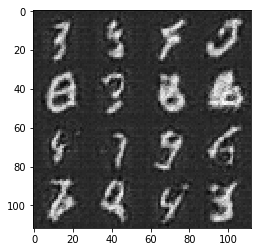

epoch:0 batch: 3710, genarator loss:3.537012, discriminator loss:0.365356
epoch:0 batch: 3720, genarator loss:3.387046, discriminator loss:0.375659
epoch:0 batch: 3730, genarator loss:2.844108, discriminator loss:0.399871
epoch:0 batch: 3740, genarator loss:1.917795, discriminator loss:0.540228
epoch:0 batch: 3750, genarator loss:3.098527, discriminator loss:0.384325
epoch:1 batch: 3760, genarator loss:2.696085, discriminator loss:0.423934
epoch:1 batch: 3770, genarator loss:2.034893, discriminator loss:0.495267
epoch:1 batch: 3780, genarator loss:2.082250, discriminator loss:0.647453
epoch:1 batch: 3790, genarator loss:1.624548, discriminator loss:0.655012
epoch:1 batch: 3800, genarator loss:1.044829, discriminator loss:0.892762


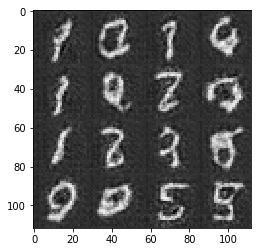

epoch:1 batch: 3810, genarator loss:1.401367, discriminator loss:0.733318
epoch:1 batch: 3820, genarator loss:2.123473, discriminator loss:0.503371
epoch:1 batch: 3830, genarator loss:1.606879, discriminator loss:0.576192
epoch:1 batch: 3840, genarator loss:1.682906, discriminator loss:0.684431
epoch:1 batch: 3850, genarator loss:1.905741, discriminator loss:0.544034
epoch:1 batch: 3860, genarator loss:6.108778, discriminator loss:3.025054
epoch:1 batch: 3870, genarator loss:1.395775, discriminator loss:0.718408
epoch:1 batch: 3880, genarator loss:3.413480, discriminator loss:0.792002
epoch:1 batch: 3890, genarator loss:2.239773, discriminator loss:0.484332
epoch:1 batch: 3900, genarator loss:1.162853, discriminator loss:1.026981


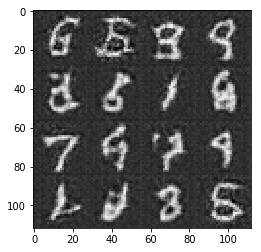

epoch:1 batch: 3910, genarator loss:2.366337, discriminator loss:0.453726
epoch:1 batch: 3920, genarator loss:1.714629, discriminator loss:0.569456
epoch:1 batch: 3930, genarator loss:2.093641, discriminator loss:0.487254
epoch:1 batch: 3940, genarator loss:1.915211, discriminator loss:0.525833
epoch:1 batch: 3950, genarator loss:2.538582, discriminator loss:0.453499
epoch:1 batch: 3960, genarator loss:2.705313, discriminator loss:0.409918
epoch:1 batch: 3970, genarator loss:1.796410, discriminator loss:0.553401
epoch:1 batch: 3980, genarator loss:3.109917, discriminator loss:2.576136
epoch:1 batch: 3990, genarator loss:2.431247, discriminator loss:0.830812
epoch:1 batch: 4000, genarator loss:2.072864, discriminator loss:0.620416


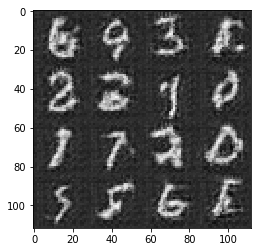

epoch:1 batch: 4010, genarator loss:3.015092, discriminator loss:0.758245
epoch:1 batch: 4020, genarator loss:2.340879, discriminator loss:0.543491
epoch:1 batch: 4030, genarator loss:1.229576, discriminator loss:0.712107
epoch:1 batch: 4040, genarator loss:2.213560, discriminator loss:0.474507
epoch:1 batch: 4050, genarator loss:1.396056, discriminator loss:0.648340
epoch:1 batch: 4060, genarator loss:1.884437, discriminator loss:0.557377
epoch:1 batch: 4070, genarator loss:1.356988, discriminator loss:0.678030
epoch:1 batch: 4080, genarator loss:3.293309, discriminator loss:0.400731
epoch:1 batch: 4090, genarator loss:1.562951, discriminator loss:0.613082
epoch:1 batch: 4100, genarator loss:1.363717, discriminator loss:0.735026


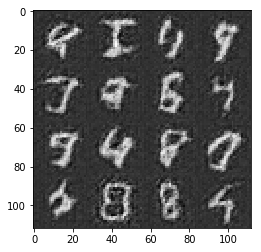

epoch:1 batch: 4110, genarator loss:2.499833, discriminator loss:0.470433
epoch:1 batch: 4120, genarator loss:2.497335, discriminator loss:0.427384
epoch:1 batch: 4130, genarator loss:3.520228, discriminator loss:0.369685
epoch:1 batch: 4140, genarator loss:2.507358, discriminator loss:0.447887
epoch:1 batch: 4150, genarator loss:4.767959, discriminator loss:0.343339
epoch:1 batch: 4160, genarator loss:2.323525, discriminator loss:0.473148
epoch:1 batch: 4170, genarator loss:2.628464, discriminator loss:0.434041
epoch:1 batch: 4180, genarator loss:1.987425, discriminator loss:0.502372
epoch:1 batch: 4190, genarator loss:4.313426, discriminator loss:0.346435
epoch:1 batch: 4200, genarator loss:1.197718, discriminator loss:0.743634


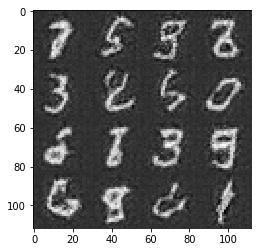

epoch:1 batch: 4210, genarator loss:2.930071, discriminator loss:0.408116
epoch:1 batch: 4220, genarator loss:4.219872, discriminator loss:0.350943
epoch:1 batch: 4230, genarator loss:2.410936, discriminator loss:0.444734
epoch:1 batch: 4240, genarator loss:3.410079, discriminator loss:0.367192
epoch:1 batch: 4250, genarator loss:2.350073, discriminator loss:0.490568
epoch:1 batch: 4260, genarator loss:3.407314, discriminator loss:0.374118
epoch:1 batch: 4270, genarator loss:2.978792, discriminator loss:0.394259
epoch:1 batch: 4280, genarator loss:2.083718, discriminator loss:0.482742
epoch:1 batch: 4290, genarator loss:3.047347, discriminator loss:0.390734
epoch:1 batch: 4300, genarator loss:4.066657, discriminator loss:0.370924


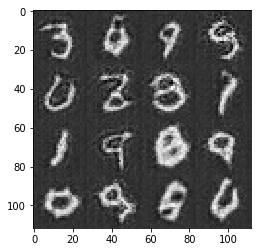

epoch:1 batch: 4310, genarator loss:3.840927, discriminator loss:0.353989
epoch:1 batch: 4320, genarator loss:2.466590, discriminator loss:0.437749
epoch:1 batch: 4330, genarator loss:2.642963, discriminator loss:0.416962
epoch:1 batch: 4340, genarator loss:2.029114, discriminator loss:0.494482
epoch:1 batch: 4350, genarator loss:2.810449, discriminator loss:0.411002
epoch:1 batch: 4360, genarator loss:2.816756, discriminator loss:0.475324
epoch:1 batch: 4370, genarator loss:2.554615, discriminator loss:0.457920
epoch:1 batch: 4380, genarator loss:1.179290, discriminator loss:0.756020
epoch:1 batch: 4390, genarator loss:3.080719, discriminator loss:0.394733
epoch:1 batch: 4400, genarator loss:3.514333, discriminator loss:0.377386


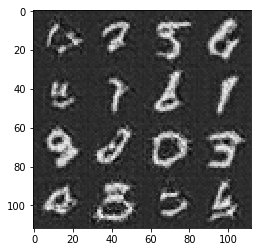

epoch:1 batch: 4410, genarator loss:0.481564, discriminator loss:1.562696
epoch:1 batch: 4420, genarator loss:1.769148, discriminator loss:0.597324
epoch:1 batch: 4430, genarator loss:1.870693, discriminator loss:0.872517
epoch:1 batch: 4440, genarator loss:1.580162, discriminator loss:0.756334
epoch:1 batch: 4450, genarator loss:2.021293, discriminator loss:0.504624
epoch:1 batch: 4460, genarator loss:2.209156, discriminator loss:0.505212
epoch:1 batch: 4470, genarator loss:2.318155, discriminator loss:0.461160
epoch:1 batch: 4480, genarator loss:4.570063, discriminator loss:0.348579
epoch:1 batch: 4490, genarator loss:1.919754, discriminator loss:0.522907
epoch:1 batch: 4500, genarator loss:2.465397, discriminator loss:0.429876


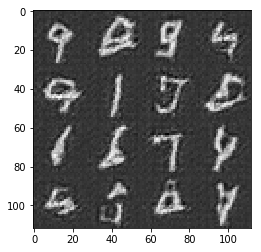

epoch:1 batch: 4510, genarator loss:2.100107, discriminator loss:0.482467
epoch:1 batch: 4520, genarator loss:3.459491, discriminator loss:0.378401
epoch:1 batch: 4530, genarator loss:4.124610, discriminator loss:0.446744
epoch:1 batch: 4540, genarator loss:3.149276, discriminator loss:0.384824
epoch:1 batch: 4550, genarator loss:2.275360, discriminator loss:0.652644
epoch:1 batch: 4560, genarator loss:1.518935, discriminator loss:0.651288
epoch:1 batch: 4570, genarator loss:3.773325, discriminator loss:0.390967
epoch:1 batch: 4580, genarator loss:1.456408, discriminator loss:0.626713
epoch:1 batch: 4590, genarator loss:2.132775, discriminator loss:0.484742
epoch:1 batch: 4600, genarator loss:2.229066, discriminator loss:0.454145


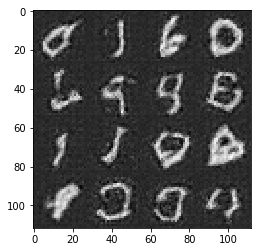

epoch:1 batch: 4610, genarator loss:2.455384, discriminator loss:0.442174
epoch:1 batch: 4620, genarator loss:2.716126, discriminator loss:0.411130
epoch:1 batch: 4630, genarator loss:3.394740, discriminator loss:0.375950
epoch:1 batch: 4640, genarator loss:2.610773, discriminator loss:0.417587
epoch:1 batch: 4650, genarator loss:2.687038, discriminator loss:0.422376
epoch:1 batch: 4660, genarator loss:3.814181, discriminator loss:0.364213
epoch:1 batch: 4670, genarator loss:3.263085, discriminator loss:0.374590
epoch:1 batch: 4680, genarator loss:3.216422, discriminator loss:0.383404
epoch:1 batch: 4690, genarator loss:3.086702, discriminator loss:0.407294
epoch:1 batch: 4700, genarator loss:1.704303, discriminator loss:0.609288


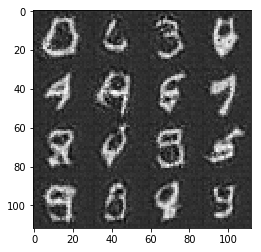

epoch:1 batch: 4710, genarator loss:2.919173, discriminator loss:0.406405
epoch:1 batch: 4720, genarator loss:3.486220, discriminator loss:0.364002
epoch:1 batch: 4730, genarator loss:2.872059, discriminator loss:0.399186
epoch:1 batch: 4740, genarator loss:2.980623, discriminator loss:0.410832
epoch:1 batch: 4750, genarator loss:2.544793, discriminator loss:0.418221
epoch:1 batch: 4760, genarator loss:3.072251, discriminator loss:0.389288
epoch:1 batch: 4770, genarator loss:2.482694, discriminator loss:0.489543
epoch:1 batch: 4780, genarator loss:2.290254, discriminator loss:0.554828
epoch:1 batch: 4790, genarator loss:2.146171, discriminator loss:0.498663
epoch:1 batch: 4800, genarator loss:2.716079, discriminator loss:0.485023


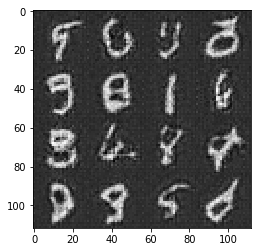

epoch:1 batch: 4810, genarator loss:3.172965, discriminator loss:0.382865
epoch:1 batch: 4820, genarator loss:2.378934, discriminator loss:0.448621
epoch:1 batch: 4830, genarator loss:2.518080, discriminator loss:0.484866
epoch:1 batch: 4840, genarator loss:2.637820, discriminator loss:0.442122
epoch:1 batch: 4850, genarator loss:1.766403, discriminator loss:0.596127
epoch:1 batch: 4860, genarator loss:2.839699, discriminator loss:0.407310
epoch:1 batch: 4870, genarator loss:2.267275, discriminator loss:0.475893
epoch:1 batch: 4880, genarator loss:3.804898, discriminator loss:0.357426
epoch:1 batch: 4890, genarator loss:2.507112, discriminator loss:0.433969
epoch:1 batch: 4900, genarator loss:2.216279, discriminator loss:0.458897


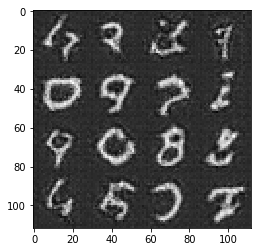

epoch:1 batch: 4910, genarator loss:1.975132, discriminator loss:0.511820
epoch:1 batch: 4920, genarator loss:2.870521, discriminator loss:0.406871
epoch:1 batch: 4930, genarator loss:1.460650, discriminator loss:0.656787
epoch:1 batch: 4940, genarator loss:2.675646, discriminator loss:0.433401
epoch:1 batch: 4950, genarator loss:2.222030, discriminator loss:0.470166
epoch:1 batch: 4960, genarator loss:2.675429, discriminator loss:0.441781
epoch:1 batch: 4970, genarator loss:1.960244, discriminator loss:0.545826
epoch:1 batch: 4980, genarator loss:0.464727, discriminator loss:1.868922
epoch:1 batch: 4990, genarator loss:2.267181, discriminator loss:0.582764
epoch:1 batch: 5000, genarator loss:1.584719, discriminator loss:0.637254


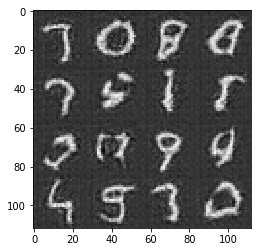

epoch:1 batch: 5010, genarator loss:2.752435, discriminator loss:0.407209
epoch:1 batch: 5020, genarator loss:4.026473, discriminator loss:0.354573
epoch:1 batch: 5030, genarator loss:2.764977, discriminator loss:0.411370
epoch:1 batch: 5040, genarator loss:2.118580, discriminator loss:0.505598
epoch:1 batch: 5050, genarator loss:2.517029, discriminator loss:0.436786
epoch:1 batch: 5060, genarator loss:1.843303, discriminator loss:0.537311
epoch:1 batch: 5070, genarator loss:2.948390, discriminator loss:0.393537
epoch:1 batch: 5080, genarator loss:3.430533, discriminator loss:0.454720
epoch:1 batch: 5090, genarator loss:2.193082, discriminator loss:0.550734
epoch:1 batch: 5100, genarator loss:1.978266, discriminator loss:0.515529


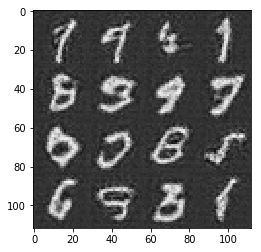

epoch:1 batch: 5110, genarator loss:3.246117, discriminator loss:0.397949
epoch:1 batch: 5120, genarator loss:2.396629, discriminator loss:0.531367
epoch:1 batch: 5130, genarator loss:2.849840, discriminator loss:0.402158
epoch:1 batch: 5140, genarator loss:1.710337, discriminator loss:0.574808
epoch:1 batch: 5150, genarator loss:2.978675, discriminator loss:0.394707
epoch:1 batch: 5160, genarator loss:1.697063, discriminator loss:0.569715
epoch:1 batch: 5170, genarator loss:2.146871, discriminator loss:0.490910
epoch:1 batch: 5180, genarator loss:2.506808, discriminator loss:0.423771
epoch:1 batch: 5190, genarator loss:2.732618, discriminator loss:0.508519
epoch:1 batch: 5200, genarator loss:2.980958, discriminator loss:0.389446


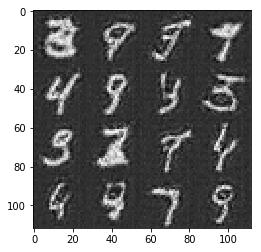

epoch:1 batch: 5210, genarator loss:2.764359, discriminator loss:0.423251
epoch:1 batch: 5220, genarator loss:3.036312, discriminator loss:0.394562
epoch:1 batch: 5230, genarator loss:1.368306, discriminator loss:0.686513
epoch:1 batch: 5240, genarator loss:2.784860, discriminator loss:0.407469
epoch:1 batch: 5250, genarator loss:2.404593, discriminator loss:0.443416
epoch:1 batch: 5260, genarator loss:4.035839, discriminator loss:0.358487
epoch:1 batch: 5270, genarator loss:3.094192, discriminator loss:0.383503
epoch:1 batch: 5280, genarator loss:1.417281, discriminator loss:0.702404
epoch:1 batch: 5290, genarator loss:1.927878, discriminator loss:0.546456
epoch:1 batch: 5300, genarator loss:3.501572, discriminator loss:0.379261


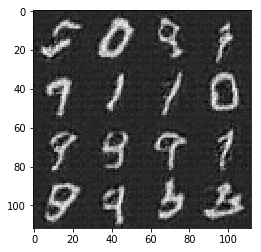

epoch:1 batch: 5310, genarator loss:4.417278, discriminator loss:0.354940
epoch:1 batch: 5320, genarator loss:2.221769, discriminator loss:0.457411
epoch:1 batch: 5330, genarator loss:2.559019, discriminator loss:0.415981
epoch:1 batch: 5340, genarator loss:3.852934, discriminator loss:0.355876
epoch:1 batch: 5350, genarator loss:3.322148, discriminator loss:0.456009
epoch:1 batch: 5360, genarator loss:2.073712, discriminator loss:0.636010
epoch:1 batch: 5370, genarator loss:3.644654, discriminator loss:0.674256
epoch:1 batch: 5380, genarator loss:1.573252, discriminator loss:0.658860
epoch:1 batch: 5390, genarator loss:1.829097, discriminator loss:0.527424
epoch:1 batch: 5400, genarator loss:2.488030, discriminator loss:0.445103


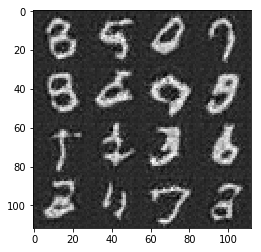

epoch:1 batch: 5410, genarator loss:2.735341, discriminator loss:0.447365
epoch:1 batch: 5420, genarator loss:2.068576, discriminator loss:0.502987
epoch:1 batch: 5430, genarator loss:3.328162, discriminator loss:1.055762
epoch:1 batch: 5440, genarator loss:1.799543, discriminator loss:0.561516
epoch:1 batch: 5450, genarator loss:2.179429, discriminator loss:0.486190
epoch:1 batch: 5460, genarator loss:2.529693, discriminator loss:0.436083
epoch:1 batch: 5470, genarator loss:2.419721, discriminator loss:0.482959
epoch:1 batch: 5480, genarator loss:2.640234, discriminator loss:0.421307
epoch:1 batch: 5490, genarator loss:1.347730, discriminator loss:0.664884
epoch:1 batch: 5500, genarator loss:2.204343, discriminator loss:0.510175


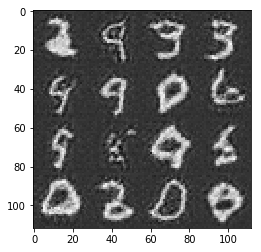

epoch:1 batch: 5510, genarator loss:2.202728, discriminator loss:0.463332
epoch:1 batch: 5520, genarator loss:2.504961, discriminator loss:0.438445
epoch:1 batch: 5530, genarator loss:2.562909, discriminator loss:0.428033
epoch:1 batch: 5540, genarator loss:3.133532, discriminator loss:0.394241
epoch:1 batch: 5550, genarator loss:3.426240, discriminator loss:0.365949
epoch:1 batch: 5560, genarator loss:4.090225, discriminator loss:0.370813
epoch:1 batch: 5570, genarator loss:2.464660, discriminator loss:0.434418
epoch:1 batch: 5580, genarator loss:3.900896, discriminator loss:0.410420
epoch:1 batch: 5590, genarator loss:2.928982, discriminator loss:0.491403
epoch:1 batch: 5600, genarator loss:2.890702, discriminator loss:0.623662


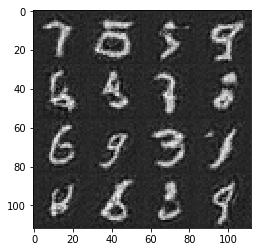

epoch:1 batch: 5610, genarator loss:1.215407, discriminator loss:0.807563
epoch:1 batch: 5620, genarator loss:3.379235, discriminator loss:0.372546
epoch:1 batch: 5630, genarator loss:2.640871, discriminator loss:0.412429
epoch:1 batch: 5640, genarator loss:3.288803, discriminator loss:0.407542
epoch:1 batch: 5650, genarator loss:3.034680, discriminator loss:0.403575
epoch:1 batch: 5660, genarator loss:2.137043, discriminator loss:0.496797
epoch:1 batch: 5670, genarator loss:3.243670, discriminator loss:0.376715
epoch:1 batch: 5680, genarator loss:2.787223, discriminator loss:0.455487
epoch:1 batch: 5690, genarator loss:2.060472, discriminator loss:0.488605
epoch:1 batch: 5700, genarator loss:1.657396, discriminator loss:0.693467


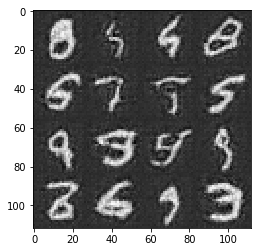

epoch:1 batch: 5710, genarator loss:2.334793, discriminator loss:0.475230
epoch:1 batch: 5720, genarator loss:1.254216, discriminator loss:0.792949
epoch:1 batch: 5730, genarator loss:2.599065, discriminator loss:0.426425
epoch:1 batch: 5740, genarator loss:2.441727, discriminator loss:0.437309
epoch:1 batch: 5750, genarator loss:2.090805, discriminator loss:0.493706
epoch:1 batch: 5760, genarator loss:1.940439, discriminator loss:0.585267
epoch:1 batch: 5770, genarator loss:3.217295, discriminator loss:0.381097
epoch:1 batch: 5780, genarator loss:1.471339, discriminator loss:0.677056
epoch:1 batch: 5790, genarator loss:2.788030, discriminator loss:0.411690
epoch:1 batch: 5800, genarator loss:1.573422, discriminator loss:0.640806


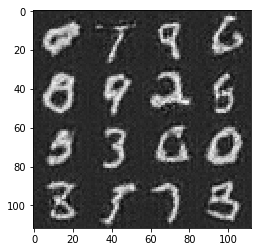

epoch:1 batch: 5810, genarator loss:2.794630, discriminator loss:0.402237
epoch:1 batch: 5820, genarator loss:2.789461, discriminator loss:0.414748
epoch:1 batch: 5830, genarator loss:1.678326, discriminator loss:0.579681
epoch:1 batch: 5840, genarator loss:2.837537, discriminator loss:0.856577
epoch:1 batch: 5850, genarator loss:3.010055, discriminator loss:0.466947
epoch:1 batch: 5860, genarator loss:1.282719, discriminator loss:0.744309
epoch:1 batch: 5870, genarator loss:3.528952, discriminator loss:0.394786
epoch:1 batch: 5880, genarator loss:1.433484, discriminator loss:0.757039
epoch:1 batch: 5890, genarator loss:2.788499, discriminator loss:0.435719
epoch:1 batch: 5900, genarator loss:2.741806, discriminator loss:0.422402


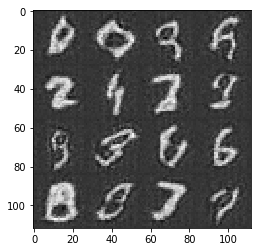

epoch:1 batch: 5910, genarator loss:1.529343, discriminator loss:0.621931
epoch:1 batch: 5920, genarator loss:1.151148, discriminator loss:0.950000
epoch:1 batch: 5930, genarator loss:1.416569, discriminator loss:0.733313
epoch:1 batch: 5940, genarator loss:2.741390, discriminator loss:0.416744
epoch:1 batch: 5950, genarator loss:2.521751, discriminator loss:0.463078
epoch:1 batch: 5960, genarator loss:3.660487, discriminator loss:0.374627
epoch:1 batch: 5970, genarator loss:1.637993, discriminator loss:0.612360
epoch:1 batch: 5980, genarator loss:2.438991, discriminator loss:0.454180
epoch:1 batch: 5990, genarator loss:1.820937, discriminator loss:0.519718
epoch:1 batch: 6000, genarator loss:1.897640, discriminator loss:0.553988


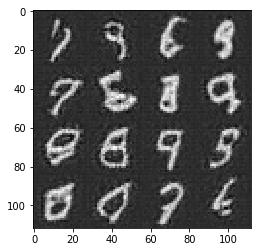

epoch:1 batch: 6010, genarator loss:2.831938, discriminator loss:0.449765
epoch:1 batch: 6020, genarator loss:2.540649, discriminator loss:0.441735
epoch:1 batch: 6030, genarator loss:2.521069, discriminator loss:0.446674
epoch:1 batch: 6040, genarator loss:2.792982, discriminator loss:0.399033
epoch:1 batch: 6050, genarator loss:2.504165, discriminator loss:0.444533
epoch:1 batch: 6060, genarator loss:2.841977, discriminator loss:0.418826
epoch:1 batch: 6070, genarator loss:2.829960, discriminator loss:0.403548
epoch:1 batch: 6080, genarator loss:0.831399, discriminator loss:1.131334
epoch:1 batch: 6090, genarator loss:1.314677, discriminator loss:0.743070
epoch:1 batch: 6100, genarator loss:1.545080, discriminator loss:0.617967


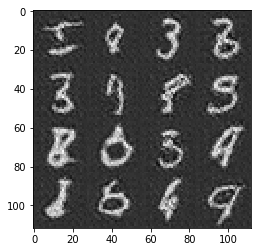

epoch:1 batch: 6110, genarator loss:2.430061, discriminator loss:0.428049
epoch:1 batch: 6120, genarator loss:2.026301, discriminator loss:0.495901
epoch:1 batch: 6130, genarator loss:1.854770, discriminator loss:0.656408
epoch:1 batch: 6140, genarator loss:3.159309, discriminator loss:0.392800
epoch:1 batch: 6150, genarator loss:1.269167, discriminator loss:0.742592
epoch:1 batch: 6160, genarator loss:2.126325, discriminator loss:0.489626
epoch:1 batch: 6170, genarator loss:2.284212, discriminator loss:0.457538
epoch:1 batch: 6180, genarator loss:0.892273, discriminator loss:1.305933
epoch:1 batch: 6190, genarator loss:1.557971, discriminator loss:0.648686
epoch:1 batch: 6200, genarator loss:2.522771, discriminator loss:0.432259


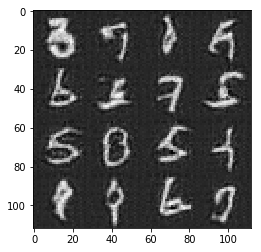

epoch:1 batch: 6210, genarator loss:2.434040, discriminator loss:0.493596
epoch:1 batch: 6220, genarator loss:2.724218, discriminator loss:0.428736
epoch:1 batch: 6230, genarator loss:1.724960, discriminator loss:0.559914
epoch:1 batch: 6240, genarator loss:1.773341, discriminator loss:0.546371
epoch:1 batch: 6250, genarator loss:3.285938, discriminator loss:0.386790
epoch:1 batch: 6260, genarator loss:2.231217, discriminator loss:0.473072
epoch:1 batch: 6270, genarator loss:0.633926, discriminator loss:1.260884
epoch:1 batch: 6280, genarator loss:2.103149, discriminator loss:0.500839
epoch:1 batch: 6290, genarator loss:2.218096, discriminator loss:0.486903
epoch:1 batch: 6300, genarator loss:2.143569, discriminator loss:0.543122


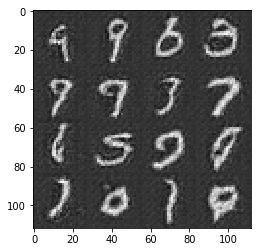

epoch:1 batch: 6310, genarator loss:1.523754, discriminator loss:0.665191
epoch:1 batch: 6320, genarator loss:3.565495, discriminator loss:0.389318
epoch:1 batch: 6330, genarator loss:2.518704, discriminator loss:0.430960
epoch:1 batch: 6340, genarator loss:1.464160, discriminator loss:0.672939
epoch:1 batch: 6350, genarator loss:1.990980, discriminator loss:0.515086
epoch:1 batch: 6360, genarator loss:2.549078, discriminator loss:0.455464
epoch:1 batch: 6370, genarator loss:2.048188, discriminator loss:0.495311
epoch:1 batch: 6380, genarator loss:2.419995, discriminator loss:0.491030
epoch:1 batch: 6390, genarator loss:1.236726, discriminator loss:0.771279
epoch:1 batch: 6400, genarator loss:2.229288, discriminator loss:0.536091


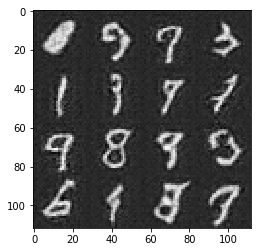

epoch:1 batch: 6410, genarator loss:2.165366, discriminator loss:0.587630
epoch:1 batch: 6420, genarator loss:1.584281, discriminator loss:0.634726
epoch:1 batch: 6430, genarator loss:2.543020, discriminator loss:0.484138
epoch:1 batch: 6440, genarator loss:2.601547, discriminator loss:0.438488
epoch:1 batch: 6450, genarator loss:1.503953, discriminator loss:0.751737
epoch:1 batch: 6460, genarator loss:1.963221, discriminator loss:0.516830
epoch:1 batch: 6470, genarator loss:1.633218, discriminator loss:0.593316
epoch:1 batch: 6480, genarator loss:2.435013, discriminator loss:0.469306
epoch:1 batch: 6490, genarator loss:1.348851, discriminator loss:0.697063
epoch:1 batch: 6500, genarator loss:1.510331, discriminator loss:0.675753


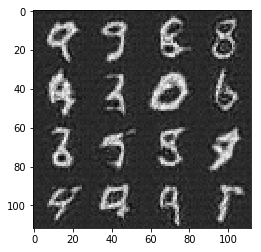

epoch:1 batch: 6510, genarator loss:1.445172, discriminator loss:0.754762
epoch:1 batch: 6520, genarator loss:2.861322, discriminator loss:0.426170
epoch:1 batch: 6530, genarator loss:2.881493, discriminator loss:0.402866
epoch:1 batch: 6540, genarator loss:1.180271, discriminator loss:0.744820
epoch:1 batch: 6550, genarator loss:1.881773, discriminator loss:0.532617
epoch:1 batch: 6560, genarator loss:2.555876, discriminator loss:0.439665
epoch:1 batch: 6570, genarator loss:2.577351, discriminator loss:0.438299
epoch:1 batch: 6580, genarator loss:2.892079, discriminator loss:0.401934
epoch:1 batch: 6590, genarator loss:3.895355, discriminator loss:0.355598
epoch:1 batch: 6600, genarator loss:0.783132, discriminator loss:1.167083


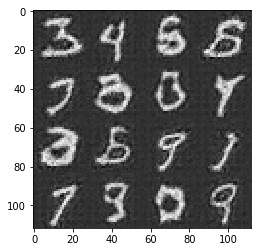

epoch:1 batch: 6610, genarator loss:1.179083, discriminator loss:0.783316
epoch:1 batch: 6620, genarator loss:2.079110, discriminator loss:0.485908
epoch:1 batch: 6630, genarator loss:2.221066, discriminator loss:0.476769
epoch:1 batch: 6640, genarator loss:1.921085, discriminator loss:0.529690
epoch:1 batch: 6650, genarator loss:2.614804, discriminator loss:0.451027
epoch:1 batch: 6660, genarator loss:2.155343, discriminator loss:0.471559
epoch:1 batch: 6670, genarator loss:2.340500, discriminator loss:0.467418
epoch:1 batch: 6680, genarator loss:1.233914, discriminator loss:0.715475
epoch:1 batch: 6690, genarator loss:3.069939, discriminator loss:0.393488
epoch:1 batch: 6700, genarator loss:1.774573, discriminator loss:0.567324


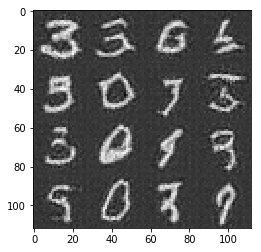

epoch:1 batch: 6710, genarator loss:3.299247, discriminator loss:0.385002
epoch:1 batch: 6720, genarator loss:2.354584, discriminator loss:0.472745
epoch:1 batch: 6730, genarator loss:2.205448, discriminator loss:0.483750
epoch:1 batch: 6740, genarator loss:1.990816, discriminator loss:0.766204
epoch:1 batch: 6750, genarator loss:2.200158, discriminator loss:0.538857
epoch:1 batch: 6760, genarator loss:1.830931, discriminator loss:0.551618
epoch:1 batch: 6770, genarator loss:1.108531, discriminator loss:0.852276
epoch:1 batch: 6780, genarator loss:1.266240, discriminator loss:0.845222
epoch:1 batch: 6790, genarator loss:2.595666, discriminator loss:0.492119
epoch:1 batch: 6800, genarator loss:2.020317, discriminator loss:0.516817


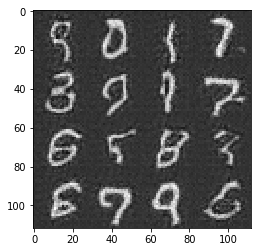

epoch:1 batch: 6810, genarator loss:2.137902, discriminator loss:0.479619
epoch:1 batch: 6820, genarator loss:2.136316, discriminator loss:0.475762
epoch:1 batch: 6830, genarator loss:2.188758, discriminator loss:0.484287
epoch:1 batch: 6840, genarator loss:1.410740, discriminator loss:0.662718
epoch:1 batch: 6850, genarator loss:3.081129, discriminator loss:0.386672
epoch:1 batch: 6860, genarator loss:2.727709, discriminator loss:0.408772
epoch:1 batch: 6870, genarator loss:2.277159, discriminator loss:0.477769
epoch:1 batch: 6880, genarator loss:2.987380, discriminator loss:0.399739
epoch:1 batch: 6890, genarator loss:3.163945, discriminator loss:0.391641
epoch:1 batch: 6900, genarator loss:3.389493, discriminator loss:0.380296


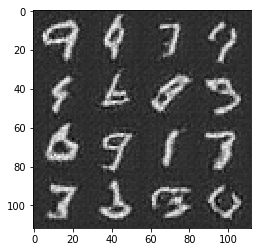

epoch:1 batch: 6910, genarator loss:2.484724, discriminator loss:0.466083
epoch:1 batch: 6920, genarator loss:2.742270, discriminator loss:0.411636
epoch:1 batch: 6930, genarator loss:3.239531, discriminator loss:0.387556
epoch:1 batch: 6940, genarator loss:2.234787, discriminator loss:0.466296
epoch:1 batch: 6950, genarator loss:2.403234, discriminator loss:0.476817
epoch:1 batch: 6960, genarator loss:2.529712, discriminator loss:0.436934
epoch:1 batch: 6970, genarator loss:2.951403, discriminator loss:0.418772
epoch:1 batch: 6980, genarator loss:2.207460, discriminator loss:0.479673
epoch:1 batch: 6990, genarator loss:2.941821, discriminator loss:0.407951
epoch:1 batch: 7000, genarator loss:1.297135, discriminator loss:0.728479


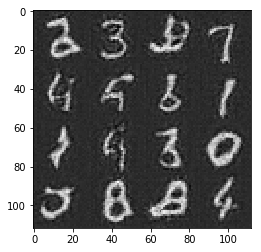

epoch:1 batch: 7010, genarator loss:3.184525, discriminator loss:0.384221
epoch:1 batch: 7020, genarator loss:1.809090, discriminator loss:0.539621
epoch:1 batch: 7030, genarator loss:4.715662, discriminator loss:0.345152
epoch:1 batch: 7040, genarator loss:2.322932, discriminator loss:0.447310
epoch:1 batch: 7050, genarator loss:3.250975, discriminator loss:0.384928
epoch:1 batch: 7060, genarator loss:3.772246, discriminator loss:0.408796
epoch:1 batch: 7070, genarator loss:2.152396, discriminator loss:0.478003
epoch:1 batch: 7080, genarator loss:2.567989, discriminator loss:0.463980
epoch:1 batch: 7090, genarator loss:2.706077, discriminator loss:0.455857
epoch:1 batch: 7100, genarator loss:3.532176, discriminator loss:0.366554


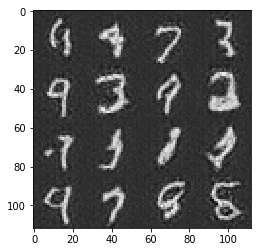

epoch:1 batch: 7110, genarator loss:2.457150, discriminator loss:0.536039
epoch:1 batch: 7120, genarator loss:3.009528, discriminator loss:0.400122
epoch:1 batch: 7130, genarator loss:1.960879, discriminator loss:0.558727
epoch:1 batch: 7140, genarator loss:2.635397, discriminator loss:0.488741
epoch:1 batch: 7150, genarator loss:3.010492, discriminator loss:0.399742
epoch:1 batch: 7160, genarator loss:2.706153, discriminator loss:0.435762
epoch:1 batch: 7170, genarator loss:3.217492, discriminator loss:0.442251
epoch:1 batch: 7180, genarator loss:1.630177, discriminator loss:0.607734
epoch:1 batch: 7190, genarator loss:2.780159, discriminator loss:0.406762
epoch:1 batch: 7200, genarator loss:2.125709, discriminator loss:0.483520


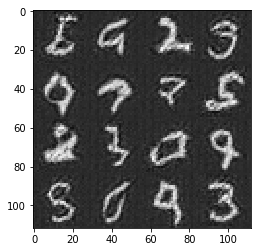

epoch:1 batch: 7210, genarator loss:4.064683, discriminator loss:0.363319
epoch:1 batch: 7220, genarator loss:2.395609, discriminator loss:0.445753
epoch:1 batch: 7230, genarator loss:2.661047, discriminator loss:0.443723
epoch:1 batch: 7240, genarator loss:3.360484, discriminator loss:0.382220
epoch:1 batch: 7250, genarator loss:1.745595, discriminator loss:0.559156
epoch:1 batch: 7260, genarator loss:2.606955, discriminator loss:0.438589
epoch:1 batch: 7270, genarator loss:4.294419, discriminator loss:0.358795
epoch:1 batch: 7280, genarator loss:3.165275, discriminator loss:0.384812
epoch:1 batch: 7290, genarator loss:0.532254, discriminator loss:1.462531
epoch:1 batch: 7300, genarator loss:1.791582, discriminator loss:0.548564


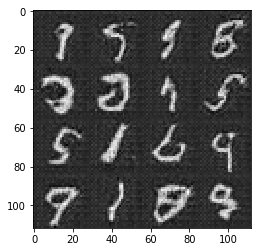

epoch:1 batch: 7310, genarator loss:2.412529, discriminator loss:0.585967
epoch:1 batch: 7320, genarator loss:0.839284, discriminator loss:1.203803
epoch:1 batch: 7330, genarator loss:1.905322, discriminator loss:0.529842
epoch:1 batch: 7340, genarator loss:2.324438, discriminator loss:0.468324
epoch:1 batch: 7350, genarator loss:2.405732, discriminator loss:0.483407
epoch:1 batch: 7360, genarator loss:2.689253, discriminator loss:0.411406
epoch:1 batch: 7370, genarator loss:0.888249, discriminator loss:1.013412
epoch:1 batch: 7380, genarator loss:1.155221, discriminator loss:0.760846
epoch:1 batch: 7390, genarator loss:1.540372, discriminator loss:0.653187
epoch:1 batch: 7400, genarator loss:2.589565, discriminator loss:0.452322


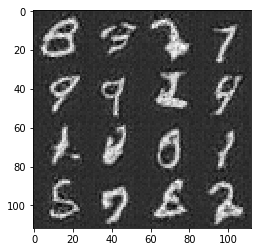

epoch:1 batch: 7410, genarator loss:2.203742, discriminator loss:0.469215
epoch:1 batch: 7420, genarator loss:2.655003, discriminator loss:0.432604
epoch:1 batch: 7430, genarator loss:0.582402, discriminator loss:1.346346
epoch:1 batch: 7440, genarator loss:2.186904, discriminator loss:0.499001
epoch:1 batch: 7450, genarator loss:2.071204, discriminator loss:0.493949
epoch:1 batch: 7460, genarator loss:2.218205, discriminator loss:0.469278
epoch:1 batch: 7470, genarator loss:2.600080, discriminator loss:0.430520
epoch:1 batch: 7480, genarator loss:1.723124, discriminator loss:0.563358
epoch:1 batch: 7490, genarator loss:1.699928, discriminator loss:0.609381
epoch:1 batch: 7500, genarator loss:2.030181, discriminator loss:0.507155


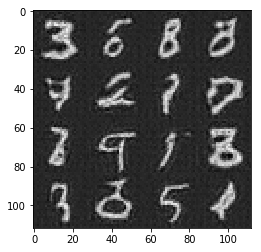

In [17]:
batch_size = 16
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

epoch:0 batch: 20, genarator loss:2.397509, discriminator loss:0.471767
epoch:0 batch: 40, genarator loss:2.389175, discriminator loss:0.533117
epoch:0 batch: 60, genarator loss:2.985783, discriminator loss:0.549669
epoch:0 batch: 80, genarator loss:10.747932, discriminator loss:0.623940
epoch:0 batch: 100, genarator loss:5.490516, discriminator loss:0.672262
epoch:0 batch: 120, genarator loss:2.661679, discriminator loss:0.479137
epoch:0 batch: 140, genarator loss:3.467271, discriminator loss:0.442595
epoch:0 batch: 160, genarator loss:5.467538, discriminator loss:0.404987
epoch:0 batch: 180, genarator loss:2.570015, discriminator loss:0.436779
epoch:0 batch: 200, genarator loss:1.589005, discriminator loss:0.618640


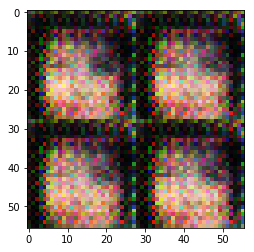

epoch:0 batch: 220, genarator loss:3.774475, discriminator loss:0.387900
epoch:0 batch: 240, genarator loss:3.569595, discriminator loss:0.376694
epoch:0 batch: 260, genarator loss:3.303669, discriminator loss:0.405830
epoch:0 batch: 280, genarator loss:4.370145, discriminator loss:0.390278
epoch:0 batch: 300, genarator loss:2.409434, discriminator loss:0.437721
epoch:0 batch: 320, genarator loss:1.327529, discriminator loss:0.679740
epoch:0 batch: 340, genarator loss:8.907648, discriminator loss:0.341813
epoch:0 batch: 360, genarator loss:6.808239, discriminator loss:0.415230
epoch:0 batch: 380, genarator loss:4.058443, discriminator loss:0.371019
epoch:0 batch: 400, genarator loss:5.949522, discriminator loss:0.428813


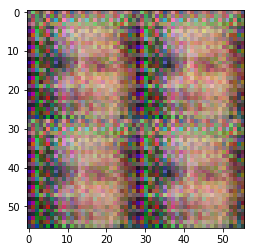

epoch:0 batch: 420, genarator loss:6.757037, discriminator loss:0.560681
epoch:0 batch: 440, genarator loss:3.859785, discriminator loss:0.382167
epoch:0 batch: 460, genarator loss:3.635761, discriminator loss:0.394882
epoch:0 batch: 480, genarator loss:7.333775, discriminator loss:0.354470
epoch:0 batch: 500, genarator loss:2.325486, discriminator loss:0.484315
epoch:0 batch: 520, genarator loss:0.238382, discriminator loss:2.238207
epoch:0 batch: 540, genarator loss:0.471795, discriminator loss:1.673427
epoch:0 batch: 560, genarator loss:2.855639, discriminator loss:0.414017
epoch:0 batch: 580, genarator loss:1.703179, discriminator loss:0.612272
epoch:0 batch: 600, genarator loss:2.384623, discriminator loss:0.558816


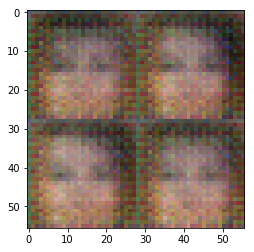

epoch:0 batch: 620, genarator loss:2.384628, discriminator loss:0.551793
epoch:0 batch: 640, genarator loss:1.524964, discriminator loss:0.798444
epoch:0 batch: 660, genarator loss:3.442170, discriminator loss:0.406504
epoch:0 batch: 680, genarator loss:3.036144, discriminator loss:0.422467
epoch:0 batch: 700, genarator loss:4.172835, discriminator loss:0.458799
epoch:0 batch: 720, genarator loss:0.450846, discriminator loss:1.513631
epoch:0 batch: 740, genarator loss:1.573265, discriminator loss:0.676565
epoch:0 batch: 760, genarator loss:2.799005, discriminator loss:0.509965
epoch:0 batch: 780, genarator loss:1.120569, discriminator loss:0.800954
epoch:0 batch: 800, genarator loss:4.421659, discriminator loss:0.519817


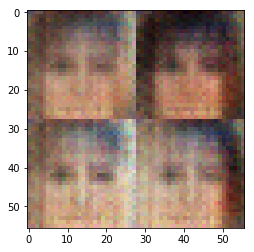

epoch:0 batch: 820, genarator loss:3.632126, discriminator loss:0.437697
epoch:0 batch: 840, genarator loss:0.484206, discriminator loss:1.703066
epoch:0 batch: 860, genarator loss:2.680720, discriminator loss:0.447329
epoch:0 batch: 880, genarator loss:0.776103, discriminator loss:1.016839
epoch:0 batch: 900, genarator loss:5.346769, discriminator loss:0.413979
epoch:0 batch: 920, genarator loss:2.613636, discriminator loss:0.795822
epoch:0 batch: 940, genarator loss:5.418452, discriminator loss:0.348929
epoch:0 batch: 960, genarator loss:6.650192, discriminator loss:0.835514
epoch:0 batch: 980, genarator loss:1.144597, discriminator loss:0.747543
epoch:0 batch: 1000, genarator loss:1.697827, discriminator loss:0.693509


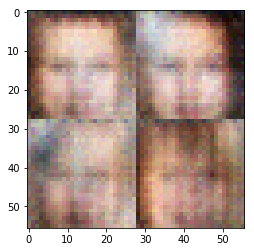

epoch:0 batch: 1020, genarator loss:3.816097, discriminator loss:0.383830
epoch:0 batch: 1040, genarator loss:4.357079, discriminator loss:0.419309
epoch:0 batch: 1060, genarator loss:3.877601, discriminator loss:0.386302
epoch:0 batch: 1080, genarator loss:1.084211, discriminator loss:0.920076
epoch:0 batch: 1100, genarator loss:5.393482, discriminator loss:0.360638
epoch:0 batch: 1120, genarator loss:3.192264, discriminator loss:0.383260
epoch:0 batch: 1140, genarator loss:4.091304, discriminator loss:0.382516
epoch:0 batch: 1160, genarator loss:5.758044, discriminator loss:0.380051
epoch:0 batch: 1180, genarator loss:0.318344, discriminator loss:1.825161
epoch:0 batch: 1200, genarator loss:8.465484, discriminator loss:0.331630


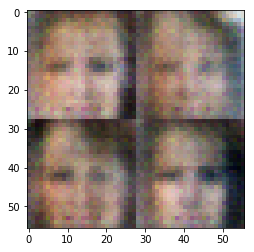

epoch:0 batch: 1220, genarator loss:8.469044, discriminator loss:0.521228
epoch:0 batch: 1240, genarator loss:1.280100, discriminator loss:0.771811
epoch:0 batch: 1260, genarator loss:0.799917, discriminator loss:0.975050
epoch:0 batch: 1280, genarator loss:7.026223, discriminator loss:0.347053
epoch:0 batch: 1300, genarator loss:2.707197, discriminator loss:0.449075
epoch:0 batch: 1320, genarator loss:6.982719, discriminator loss:0.347302
epoch:0 batch: 1340, genarator loss:2.986230, discriminator loss:0.408818
epoch:0 batch: 1360, genarator loss:6.251449, discriminator loss:0.382858
epoch:0 batch: 1380, genarator loss:8.780497, discriminator loss:0.328248
epoch:0 batch: 1400, genarator loss:1.375915, discriminator loss:0.642595


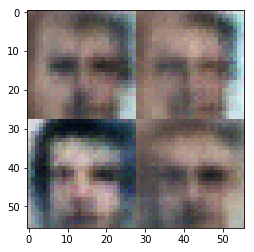

epoch:0 batch: 1420, genarator loss:11.963644, discriminator loss:0.365832
epoch:0 batch: 1440, genarator loss:9.316750, discriminator loss:0.333269
epoch:0 batch: 1460, genarator loss:0.988341, discriminator loss:0.876184
epoch:0 batch: 1480, genarator loss:5.103901, discriminator loss:0.342386
epoch:0 batch: 1500, genarator loss:5.899005, discriminator loss:0.339742
epoch:0 batch: 1520, genarator loss:9.018479, discriminator loss:0.336377
epoch:0 batch: 1540, genarator loss:3.319461, discriminator loss:0.413621
epoch:0 batch: 1560, genarator loss:4.995754, discriminator loss:0.398884
epoch:0 batch: 1580, genarator loss:8.047201, discriminator loss:0.333079
epoch:0 batch: 1600, genarator loss:1.076978, discriminator loss:0.783199


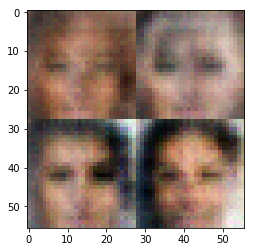

epoch:0 batch: 1620, genarator loss:8.002923, discriminator loss:0.389626
epoch:0 batch: 1640, genarator loss:5.301178, discriminator loss:0.427671
epoch:0 batch: 1660, genarator loss:0.353876, discriminator loss:1.741498
epoch:0 batch: 1680, genarator loss:0.507604, discriminator loss:1.362984
epoch:0 batch: 1700, genarator loss:9.051210, discriminator loss:0.347569
epoch:0 batch: 1720, genarator loss:1.010123, discriminator loss:0.845880
epoch:0 batch: 1740, genarator loss:8.006205, discriminator loss:0.362572
epoch:0 batch: 1760, genarator loss:8.871735, discriminator loss:0.339013
epoch:0 batch: 1780, genarator loss:4.002483, discriminator loss:0.357064
epoch:0 batch: 1800, genarator loss:0.581484, discriminator loss:1.209727


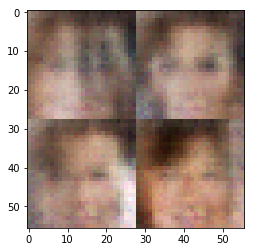

epoch:0 batch: 1820, genarator loss:9.830271, discriminator loss:0.355647
epoch:0 batch: 1840, genarator loss:10.024723, discriminator loss:0.366055
epoch:0 batch: 1860, genarator loss:2.973530, discriminator loss:0.414871
epoch:0 batch: 1880, genarator loss:5.505982, discriminator loss:0.348927
epoch:0 batch: 1900, genarator loss:7.784779, discriminator loss:0.329771
epoch:0 batch: 1920, genarator loss:10.144320, discriminator loss:0.345946
epoch:0 batch: 1940, genarator loss:3.531888, discriminator loss:0.376645
epoch:0 batch: 1960, genarator loss:3.676717, discriminator loss:0.427738
epoch:0 batch: 1980, genarator loss:9.543991, discriminator loss:0.385488
epoch:0 batch: 2000, genarator loss:12.360701, discriminator loss:0.330505


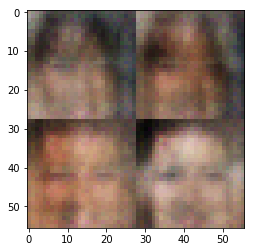

epoch:0 batch: 2020, genarator loss:3.027526, discriminator loss:0.396295
epoch:0 batch: 2040, genarator loss:2.288231, discriminator loss:0.459410
epoch:0 batch: 2060, genarator loss:2.089372, discriminator loss:0.519919
epoch:0 batch: 2080, genarator loss:1.909243, discriminator loss:0.496568
epoch:0 batch: 2100, genarator loss:10.128956, discriminator loss:0.329078
epoch:0 batch: 2120, genarator loss:7.203402, discriminator loss:0.330276
epoch:0 batch: 2140, genarator loss:4.276408, discriminator loss:0.392293
epoch:0 batch: 2160, genarator loss:10.834335, discriminator loss:0.334294
epoch:0 batch: 2180, genarator loss:6.929233, discriminator loss:2.263644
epoch:0 batch: 2200, genarator loss:1.426878, discriminator loss:0.613450


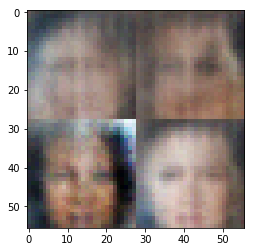

epoch:0 batch: 2220, genarator loss:9.097832, discriminator loss:0.341899
epoch:0 batch: 2240, genarator loss:3.954257, discriminator loss:0.360580
epoch:0 batch: 2260, genarator loss:7.154710, discriminator loss:0.332003
epoch:0 batch: 2280, genarator loss:3.827053, discriminator loss:0.359694
epoch:0 batch: 2300, genarator loss:2.538439, discriminator loss:0.416299
epoch:0 batch: 2320, genarator loss:5.438410, discriminator loss:0.340437
epoch:0 batch: 2340, genarator loss:7.270261, discriminator loss:0.328329
epoch:0 batch: 2360, genarator loss:5.181617, discriminator loss:0.369312
epoch:0 batch: 2380, genarator loss:9.411211, discriminator loss:0.361789
epoch:0 batch: 2400, genarator loss:7.455078, discriminator loss:0.336597


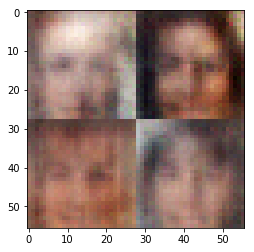

epoch:0 batch: 2420, genarator loss:9.651512, discriminator loss:0.336402
epoch:0 batch: 2440, genarator loss:0.230649, discriminator loss:1.982059
epoch:0 batch: 2460, genarator loss:2.211553, discriminator loss:0.503010
epoch:0 batch: 2480, genarator loss:3.796223, discriminator loss:0.361142
epoch:0 batch: 2500, genarator loss:8.501527, discriminator loss:0.347734
epoch:0 batch: 2520, genarator loss:9.732531, discriminator loss:0.330974
epoch:0 batch: 2540, genarator loss:8.579072, discriminator loss:0.356283
epoch:0 batch: 2560, genarator loss:7.929792, discriminator loss:0.332364
epoch:0 batch: 2580, genarator loss:4.100363, discriminator loss:0.368284
epoch:0 batch: 2600, genarator loss:5.424776, discriminator loss:0.343581


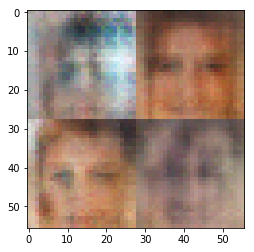

epoch:0 batch: 2620, genarator loss:1.046480, discriminator loss:0.791994
epoch:0 batch: 2640, genarator loss:6.746133, discriminator loss:0.328074
epoch:0 batch: 2660, genarator loss:6.981546, discriminator loss:0.330264
epoch:0 batch: 2680, genarator loss:7.221135, discriminator loss:0.332957
epoch:0 batch: 2700, genarator loss:11.253807, discriminator loss:0.328710
epoch:0 batch: 2720, genarator loss:9.422942, discriminator loss:0.327982
epoch:0 batch: 2740, genarator loss:8.081360, discriminator loss:0.358204
epoch:0 batch: 2760, genarator loss:8.462711, discriminator loss:0.816620
epoch:0 batch: 2780, genarator loss:7.072442, discriminator loss:0.330644
epoch:0 batch: 2800, genarator loss:4.701798, discriminator loss:0.340255


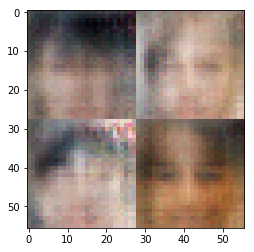

epoch:0 batch: 2820, genarator loss:7.352695, discriminator loss:0.346705
epoch:0 batch: 2840, genarator loss:9.566331, discriminator loss:0.331576
epoch:0 batch: 2860, genarator loss:7.951422, discriminator loss:0.327984
epoch:0 batch: 2880, genarator loss:6.155601, discriminator loss:0.331609
epoch:0 batch: 2900, genarator loss:5.469291, discriminator loss:0.389001
epoch:0 batch: 2920, genarator loss:6.229311, discriminator loss:0.334158
epoch:0 batch: 2940, genarator loss:5.749692, discriminator loss:0.334872
epoch:0 batch: 2960, genarator loss:9.572247, discriminator loss:0.334723
epoch:0 batch: 2980, genarator loss:8.291194, discriminator loss:0.335167
epoch:0 batch: 3000, genarator loss:9.828671, discriminator loss:0.333254


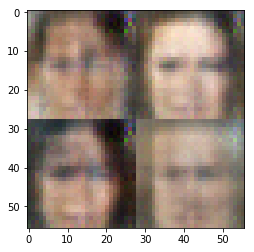

epoch:0 batch: 3020, genarator loss:7.883300, discriminator loss:0.330299
epoch:0 batch: 3040, genarator loss:11.419779, discriminator loss:0.341143
epoch:0 batch: 3060, genarator loss:8.101061, discriminator loss:0.331066
epoch:0 batch: 3080, genarator loss:8.844447, discriminator loss:0.327850
epoch:0 batch: 3100, genarator loss:8.516687, discriminator loss:0.334264
epoch:0 batch: 3120, genarator loss:9.213095, discriminator loss:0.360229
epoch:0 batch: 3140, genarator loss:5.819659, discriminator loss:0.345966
epoch:0 batch: 3160, genarator loss:3.777446, discriminator loss:0.361094
epoch:0 batch: 3180, genarator loss:5.981374, discriminator loss:0.332681
epoch:0 batch: 3200, genarator loss:8.860794, discriminator loss:0.331225


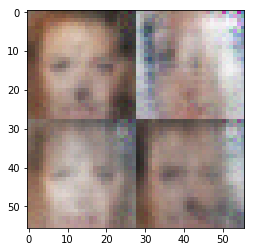

epoch:0 batch: 3220, genarator loss:2.700514, discriminator loss:0.427871
epoch:0 batch: 3240, genarator loss:10.352974, discriminator loss:0.341335
epoch:0 batch: 3260, genarator loss:4.216878, discriminator loss:0.345591
epoch:0 batch: 3280, genarator loss:3.669219, discriminator loss:0.370932
epoch:0 batch: 3300, genarator loss:8.835623, discriminator loss:0.336665
epoch:0 batch: 3320, genarator loss:5.717690, discriminator loss:0.362824
epoch:0 batch: 3340, genarator loss:10.274286, discriminator loss:0.333734
epoch:0 batch: 3360, genarator loss:8.866622, discriminator loss:0.327467
epoch:0 batch: 3380, genarator loss:10.064165, discriminator loss:0.328960
epoch:0 batch: 3400, genarator loss:8.375238, discriminator loss:0.329775


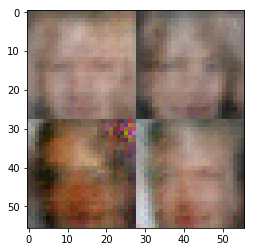

epoch:0 batch: 3420, genarator loss:11.033403, discriminator loss:0.330772
epoch:0 batch: 3440, genarator loss:3.403933, discriminator loss:0.373260
epoch:0 batch: 3460, genarator loss:3.283461, discriminator loss:0.376253
epoch:0 batch: 3480, genarator loss:4.625953, discriminator loss:0.347999
epoch:0 batch: 3500, genarator loss:7.886146, discriminator loss:0.331921
epoch:0 batch: 3520, genarator loss:5.155662, discriminator loss:0.339505
epoch:0 batch: 3540, genarator loss:3.958278, discriminator loss:0.352057
epoch:0 batch: 3560, genarator loss:8.396900, discriminator loss:0.348042
epoch:0 batch: 3580, genarator loss:8.833477, discriminator loss:0.389577
epoch:0 batch: 3600, genarator loss:7.888158, discriminator loss:0.341210


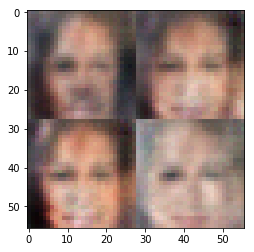

epoch:0 batch: 3620, genarator loss:2.266403, discriminator loss:0.456146
epoch:0 batch: 3640, genarator loss:6.845209, discriminator loss:0.328999
epoch:0 batch: 3660, genarator loss:9.701138, discriminator loss:0.339340
epoch:0 batch: 3680, genarator loss:2.593896, discriminator loss:0.572888
epoch:0 batch: 3700, genarator loss:3.440313, discriminator loss:0.393797
epoch:0 batch: 3720, genarator loss:3.838025, discriminator loss:0.354099
epoch:0 batch: 3740, genarator loss:10.644503, discriminator loss:0.338090
epoch:0 batch: 3760, genarator loss:8.019803, discriminator loss:0.331196
epoch:0 batch: 3780, genarator loss:7.270470, discriminator loss:0.340697
epoch:0 batch: 3800, genarator loss:6.498241, discriminator loss:0.334730


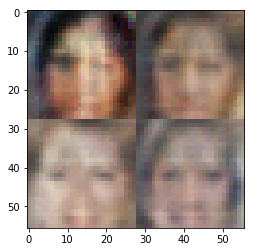

epoch:0 batch: 3820, genarator loss:8.526545, discriminator loss:0.337335
epoch:0 batch: 3840, genarator loss:5.689057, discriminator loss:0.338063
epoch:0 batch: 3860, genarator loss:7.297434, discriminator loss:0.348241
epoch:0 batch: 3880, genarator loss:2.170619, discriminator loss:0.481025
epoch:0 batch: 3900, genarator loss:6.644279, discriminator loss:0.389767
epoch:0 batch: 3920, genarator loss:2.862277, discriminator loss:0.470773
epoch:0 batch: 3940, genarator loss:5.255053, discriminator loss:0.374322
epoch:0 batch: 3960, genarator loss:5.431790, discriminator loss:0.351370
epoch:0 batch: 3980, genarator loss:7.696315, discriminator loss:0.334873
epoch:0 batch: 4000, genarator loss:0.647920, discriminator loss:1.145326


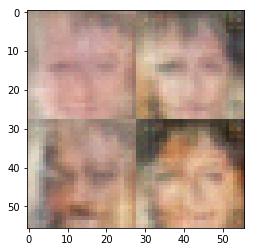

epoch:0 batch: 4020, genarator loss:5.328187, discriminator loss:0.352719
epoch:0 batch: 4040, genarator loss:4.199988, discriminator loss:0.353181
epoch:0 batch: 4060, genarator loss:9.786146, discriminator loss:0.335005
epoch:0 batch: 4080, genarator loss:10.454491, discriminator loss:0.349000
epoch:0 batch: 4100, genarator loss:10.363451, discriminator loss:0.327656
epoch:0 batch: 4120, genarator loss:7.481275, discriminator loss:0.330765
epoch:0 batch: 4140, genarator loss:11.284932, discriminator loss:0.529034
epoch:0 batch: 4160, genarator loss:5.886030, discriminator loss:0.330911
epoch:0 batch: 4180, genarator loss:11.921249, discriminator loss:0.335886
epoch:0 batch: 4200, genarator loss:10.963610, discriminator loss:0.336738


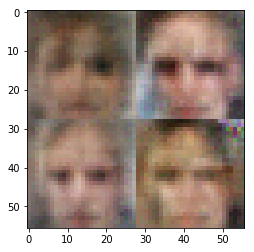

epoch:0 batch: 4220, genarator loss:11.032837, discriminator loss:0.337106
epoch:0 batch: 4240, genarator loss:6.530003, discriminator loss:0.339148
epoch:0 batch: 4260, genarator loss:10.995882, discriminator loss:0.334489
epoch:0 batch: 4280, genarator loss:8.078339, discriminator loss:0.342348
epoch:0 batch: 4300, genarator loss:7.928362, discriminator loss:0.342162
epoch:0 batch: 4320, genarator loss:6.062125, discriminator loss:0.342379
epoch:0 batch: 4340, genarator loss:9.502731, discriminator loss:0.358436
epoch:0 batch: 4360, genarator loss:9.807484, discriminator loss:0.358918
epoch:0 batch: 4380, genarator loss:11.767357, discriminator loss:0.355672
epoch:0 batch: 4400, genarator loss:4.874896, discriminator loss:0.362560


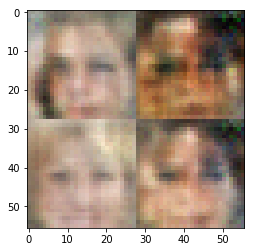

epoch:0 batch: 4420, genarator loss:11.765088, discriminator loss:0.331363
epoch:0 batch: 4440, genarator loss:8.110061, discriminator loss:0.335923
epoch:0 batch: 4460, genarator loss:1.777064, discriminator loss:0.601053
epoch:0 batch: 4480, genarator loss:11.227149, discriminator loss:0.342232
epoch:0 batch: 4500, genarator loss:11.399041, discriminator loss:0.326594
epoch:0 batch: 4520, genarator loss:6.348643, discriminator loss:0.332481
epoch:0 batch: 4540, genarator loss:10.415723, discriminator loss:0.328090
epoch:0 batch: 4560, genarator loss:8.133553, discriminator loss:0.333714
epoch:0 batch: 4580, genarator loss:8.855200, discriminator loss:0.326602
epoch:0 batch: 4600, genarator loss:5.293888, discriminator loss:0.341724


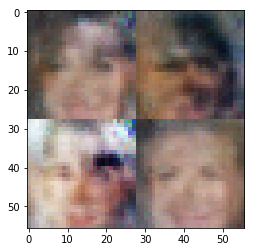

epoch:0 batch: 4620, genarator loss:9.291924, discriminator loss:0.342339
epoch:0 batch: 4640, genarator loss:6.168044, discriminator loss:0.412985
epoch:0 batch: 4660, genarator loss:3.811490, discriminator loss:0.362727
epoch:0 batch: 4680, genarator loss:9.649462, discriminator loss:2.510259
epoch:0 batch: 4700, genarator loss:1.491865, discriminator loss:0.624939
epoch:0 batch: 4720, genarator loss:4.171072, discriminator loss:0.372144
epoch:0 batch: 4740, genarator loss:0.630228, discriminator loss:1.222020
epoch:0 batch: 4760, genarator loss:1.806123, discriminator loss:0.569370
epoch:0 batch: 4780, genarator loss:3.989118, discriminator loss:0.351858
epoch:0 batch: 4800, genarator loss:9.169727, discriminator loss:0.353207


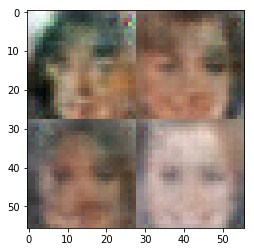

epoch:0 batch: 4820, genarator loss:4.508932, discriminator loss:0.401159
epoch:0 batch: 4840, genarator loss:4.634126, discriminator loss:0.373497
epoch:0 batch: 4860, genarator loss:9.188875, discriminator loss:0.331651
epoch:0 batch: 4880, genarator loss:5.315547, discriminator loss:0.354338
epoch:0 batch: 4900, genarator loss:7.384112, discriminator loss:0.332888
epoch:0 batch: 4920, genarator loss:6.559615, discriminator loss:0.376103
epoch:0 batch: 4940, genarator loss:7.864285, discriminator loss:0.328830
epoch:0 batch: 4960, genarator loss:5.939003, discriminator loss:0.334076
epoch:0 batch: 4980, genarator loss:6.609177, discriminator loss:0.334970
epoch:0 batch: 5000, genarator loss:2.097824, discriminator loss:0.477113


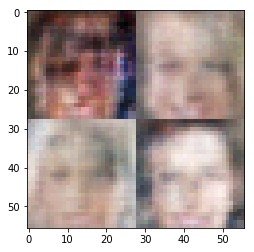

epoch:0 batch: 5020, genarator loss:7.999476, discriminator loss:0.654362
epoch:0 batch: 5040, genarator loss:5.363034, discriminator loss:0.341386
epoch:0 batch: 5060, genarator loss:6.594829, discriminator loss:0.334142
epoch:0 batch: 5080, genarator loss:3.103517, discriminator loss:0.437620
epoch:0 batch: 5100, genarator loss:2.828085, discriminator loss:0.404334
epoch:0 batch: 5120, genarator loss:7.340371, discriminator loss:0.333424
epoch:0 batch: 5140, genarator loss:9.106184, discriminator loss:0.332045
epoch:0 batch: 5160, genarator loss:5.331726, discriminator loss:0.341531
epoch:0 batch: 5180, genarator loss:10.382608, discriminator loss:0.341139
epoch:0 batch: 5200, genarator loss:6.040259, discriminator loss:0.333070


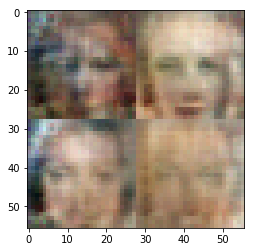

epoch:0 batch: 5220, genarator loss:5.493957, discriminator loss:0.335718
epoch:0 batch: 5240, genarator loss:9.550991, discriminator loss:0.327563
epoch:0 batch: 5260, genarator loss:3.167693, discriminator loss:0.413310
epoch:0 batch: 5280, genarator loss:2.417736, discriminator loss:0.437262
epoch:0 batch: 5300, genarator loss:4.485711, discriminator loss:0.348366
epoch:0 batch: 5320, genarator loss:8.542883, discriminator loss:0.332212
epoch:0 batch: 5340, genarator loss:8.541082, discriminator loss:0.328504
epoch:0 batch: 5360, genarator loss:7.021095, discriminator loss:0.336945
epoch:0 batch: 5380, genarator loss:7.523775, discriminator loss:0.340010
epoch:0 batch: 5400, genarator loss:3.678094, discriminator loss:0.364948


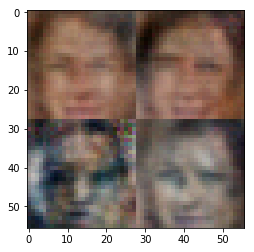

epoch:0 batch: 5420, genarator loss:6.272966, discriminator loss:0.543357
epoch:0 batch: 5440, genarator loss:2.125915, discriminator loss:0.461740
epoch:0 batch: 5460, genarator loss:1.582852, discriminator loss:0.640923
epoch:0 batch: 5480, genarator loss:7.808611, discriminator loss:0.363981
epoch:0 batch: 5500, genarator loss:4.626038, discriminator loss:0.353834
epoch:0 batch: 5520, genarator loss:1.759993, discriminator loss:0.589976
epoch:0 batch: 5540, genarator loss:4.183701, discriminator loss:0.367264
epoch:0 batch: 5560, genarator loss:2.418948, discriminator loss:0.462534
epoch:0 batch: 5580, genarator loss:9.755509, discriminator loss:0.331361
epoch:0 batch: 5600, genarator loss:2.013261, discriminator loss:0.519855


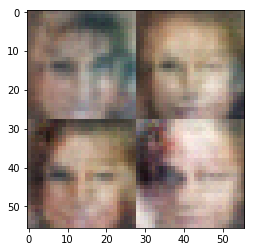

epoch:0 batch: 5620, genarator loss:5.251470, discriminator loss:0.334829
epoch:0 batch: 5640, genarator loss:2.440982, discriminator loss:0.547270
epoch:0 batch: 5660, genarator loss:3.907563, discriminator loss:0.356377
epoch:0 batch: 5680, genarator loss:2.745434, discriminator loss:0.416473
epoch:0 batch: 5700, genarator loss:3.585365, discriminator loss:0.389420
epoch:0 batch: 5720, genarator loss:7.808392, discriminator loss:0.373886
epoch:0 batch: 5740, genarator loss:7.289766, discriminator loss:0.405326
epoch:0 batch: 5760, genarator loss:2.456866, discriminator loss:0.464234
epoch:0 batch: 5780, genarator loss:11.011113, discriminator loss:0.366948
epoch:0 batch: 5800, genarator loss:0.879220, discriminator loss:0.977477


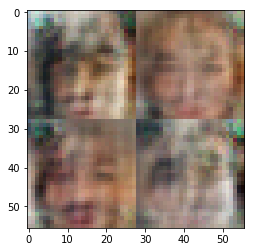

epoch:0 batch: 5820, genarator loss:8.856272, discriminator loss:0.329780
epoch:0 batch: 5840, genarator loss:7.335163, discriminator loss:0.332620
epoch:0 batch: 5860, genarator loss:3.822237, discriminator loss:0.384267
epoch:0 batch: 5880, genarator loss:7.844795, discriminator loss:0.339467
epoch:0 batch: 5900, genarator loss:8.104813, discriminator loss:0.342621
epoch:0 batch: 5920, genarator loss:2.955184, discriminator loss:0.448853
epoch:0 batch: 5940, genarator loss:4.397911, discriminator loss:0.347488
epoch:0 batch: 5960, genarator loss:1.988783, discriminator loss:0.506745
epoch:0 batch: 5980, genarator loss:7.371989, discriminator loss:0.340027
epoch:0 batch: 6000, genarator loss:1.050513, discriminator loss:0.834360


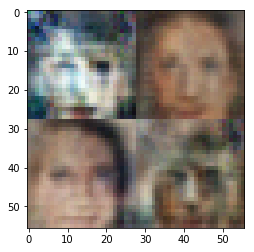

epoch:0 batch: 6020, genarator loss:1.060716, discriminator loss:0.847170
epoch:0 batch: 6040, genarator loss:2.933977, discriminator loss:0.425594
epoch:0 batch: 6060, genarator loss:4.453748, discriminator loss:0.358785
epoch:0 batch: 6080, genarator loss:3.096330, discriminator loss:0.405099
epoch:0 batch: 6100, genarator loss:2.428074, discriminator loss:0.452502
epoch:0 batch: 6120, genarator loss:8.687621, discriminator loss:0.336660
epoch:0 batch: 6140, genarator loss:8.421162, discriminator loss:0.348432
epoch:0 batch: 6160, genarator loss:7.873823, discriminator loss:0.349961
epoch:0 batch: 6180, genarator loss:2.663726, discriminator loss:0.442015
epoch:0 batch: 6200, genarator loss:2.668234, discriminator loss:0.466354


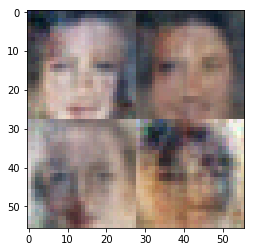

epoch:0 batch: 6220, genarator loss:8.769382, discriminator loss:0.341732
epoch:0 batch: 6240, genarator loss:2.512623, discriminator loss:0.518721
epoch:0 batch: 6260, genarator loss:4.631426, discriminator loss:0.345342
epoch:0 batch: 6280, genarator loss:6.151434, discriminator loss:0.395141
epoch:0 batch: 6300, genarator loss:7.315328, discriminator loss:0.338540
epoch:0 batch: 6320, genarator loss:4.125717, discriminator loss:0.383215
epoch:0 batch: 6340, genarator loss:6.896807, discriminator loss:0.337579
epoch:0 batch: 6360, genarator loss:2.623034, discriminator loss:0.468116
epoch:0 batch: 6380, genarator loss:6.875584, discriminator loss:0.585613
epoch:0 batch: 6400, genarator loss:3.447595, discriminator loss:0.401528


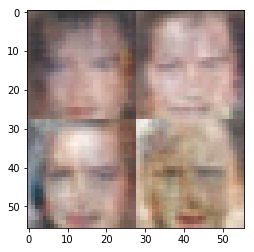

epoch:0 batch: 6420, genarator loss:4.244135, discriminator loss:0.364950
epoch:0 batch: 6440, genarator loss:5.367771, discriminator loss:0.343628
epoch:0 batch: 6460, genarator loss:11.453743, discriminator loss:0.537714
epoch:0 batch: 6480, genarator loss:9.903049, discriminator loss:0.336843
epoch:0 batch: 6500, genarator loss:6.445561, discriminator loss:0.335980
epoch:0 batch: 6520, genarator loss:6.822824, discriminator loss:0.336042
epoch:0 batch: 6540, genarator loss:5.176476, discriminator loss:0.354576
epoch:0 batch: 6560, genarator loss:5.087300, discriminator loss:0.352981
epoch:0 batch: 6580, genarator loss:9.195700, discriminator loss:0.371807
epoch:0 batch: 6600, genarator loss:3.682381, discriminator loss:0.384089


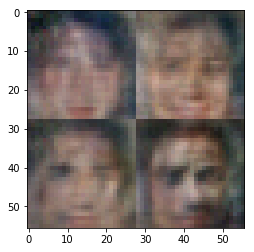

epoch:0 batch: 6620, genarator loss:5.925966, discriminator loss:0.354216
epoch:0 batch: 6640, genarator loss:8.564979, discriminator loss:0.383183
epoch:0 batch: 6660, genarator loss:2.875662, discriminator loss:0.485935
epoch:0 batch: 6680, genarator loss:6.659541, discriminator loss:0.338945
epoch:0 batch: 6700, genarator loss:7.842963, discriminator loss:0.337179
epoch:0 batch: 6720, genarator loss:1.518796, discriminator loss:0.722159
epoch:0 batch: 6740, genarator loss:1.646329, discriminator loss:0.616585
epoch:0 batch: 6760, genarator loss:1.642932, discriminator loss:0.615241
epoch:0 batch: 6780, genarator loss:0.901398, discriminator loss:1.072844
epoch:0 batch: 6800, genarator loss:3.199205, discriminator loss:0.442277


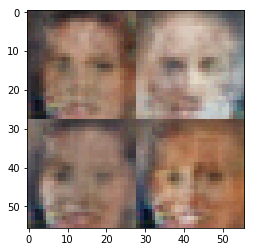

epoch:0 batch: 6820, genarator loss:2.081114, discriminator loss:0.498771
epoch:0 batch: 6840, genarator loss:8.695875, discriminator loss:0.392103
epoch:0 batch: 6860, genarator loss:2.958460, discriminator loss:0.440936
epoch:0 batch: 6880, genarator loss:4.421102, discriminator loss:0.464153
epoch:0 batch: 6900, genarator loss:2.566081, discriminator loss:0.436393
epoch:0 batch: 6920, genarator loss:4.679270, discriminator loss:0.349328
epoch:0 batch: 6940, genarator loss:7.211177, discriminator loss:0.334915
epoch:0 batch: 6960, genarator loss:2.237054, discriminator loss:0.487520
epoch:0 batch: 6980, genarator loss:2.464768, discriminator loss:0.449214
epoch:0 batch: 7000, genarator loss:3.199070, discriminator loss:0.750978


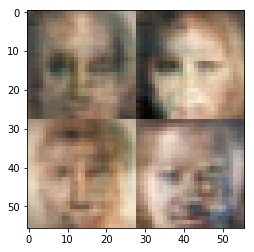

epoch:0 batch: 7020, genarator loss:4.352705, discriminator loss:0.373839
epoch:0 batch: 7040, genarator loss:3.888736, discriminator loss:0.392909
epoch:0 batch: 7060, genarator loss:9.701908, discriminator loss:0.339186
epoch:0 batch: 7080, genarator loss:5.775870, discriminator loss:0.340355
epoch:0 batch: 7100, genarator loss:6.862188, discriminator loss:0.520456
epoch:0 batch: 7120, genarator loss:4.158742, discriminator loss:0.353670
epoch:0 batch: 7140, genarator loss:5.317122, discriminator loss:0.360109
epoch:0 batch: 7160, genarator loss:6.996838, discriminator loss:0.341029
epoch:0 batch: 7180, genarator loss:2.636936, discriminator loss:0.443603
epoch:0 batch: 7200, genarator loss:5.720693, discriminator loss:0.337654


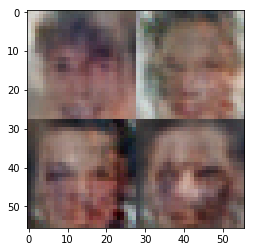

epoch:0 batch: 7220, genarator loss:5.502176, discriminator loss:0.335260
epoch:0 batch: 7240, genarator loss:2.421117, discriminator loss:0.473545
epoch:0 batch: 7260, genarator loss:4.476769, discriminator loss:0.372771
epoch:0 batch: 7280, genarator loss:0.488214, discriminator loss:1.434784
epoch:0 batch: 7300, genarator loss:0.935346, discriminator loss:0.881539
epoch:0 batch: 7320, genarator loss:4.420355, discriminator loss:0.358603
epoch:0 batch: 7340, genarator loss:0.717715, discriminator loss:1.140747
epoch:0 batch: 7360, genarator loss:3.234308, discriminator loss:0.413829
epoch:0 batch: 7380, genarator loss:3.764658, discriminator loss:0.360887
epoch:0 batch: 7400, genarator loss:1.514324, discriminator loss:0.626187


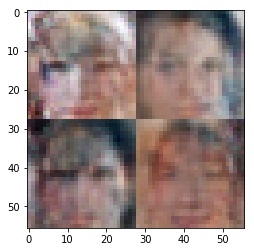

epoch:0 batch: 7420, genarator loss:0.940392, discriminator loss:0.970168
epoch:0 batch: 7440, genarator loss:3.584806, discriminator loss:0.397098
epoch:0 batch: 7460, genarator loss:5.315686, discriminator loss:0.416076
epoch:0 batch: 7480, genarator loss:5.573332, discriminator loss:0.364944
epoch:0 batch: 7500, genarator loss:3.046700, discriminator loss:0.418419
epoch:0 batch: 7520, genarator loss:7.255471, discriminator loss:0.360923
epoch:0 batch: 7540, genarator loss:8.725243, discriminator loss:0.340427
epoch:0 batch: 7560, genarator loss:4.742156, discriminator loss:0.407468
epoch:0 batch: 7580, genarator loss:4.255673, discriminator loss:0.362110
epoch:0 batch: 7600, genarator loss:6.364710, discriminator loss:0.368369


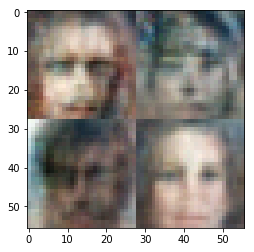

epoch:0 batch: 7620, genarator loss:5.293044, discriminator loss:0.344206
epoch:0 batch: 7640, genarator loss:3.086398, discriminator loss:0.423340
epoch:0 batch: 7660, genarator loss:5.638709, discriminator loss:0.503921
epoch:0 batch: 7680, genarator loss:3.192518, discriminator loss:0.555648
epoch:0 batch: 7700, genarator loss:5.611302, discriminator loss:0.347246
epoch:0 batch: 7720, genarator loss:4.440941, discriminator loss:0.359497
epoch:0 batch: 7740, genarator loss:3.165219, discriminator loss:0.505499
epoch:0 batch: 7760, genarator loss:1.445018, discriminator loss:0.689568
epoch:0 batch: 7780, genarator loss:4.188865, discriminator loss:0.395054
epoch:0 batch: 7800, genarator loss:2.878092, discriminator loss:0.431410


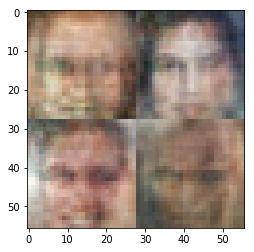

epoch:0 batch: 7820, genarator loss:4.173800, discriminator loss:0.394595
epoch:0 batch: 7840, genarator loss:8.230188, discriminator loss:0.348520
epoch:0 batch: 7860, genarator loss:3.712755, discriminator loss:0.397029
epoch:0 batch: 7880, genarator loss:5.358865, discriminator loss:0.345262
epoch:0 batch: 7900, genarator loss:9.538641, discriminator loss:0.340171
epoch:0 batch: 7920, genarator loss:2.218164, discriminator loss:0.556342
epoch:0 batch: 7940, genarator loss:4.373622, discriminator loss:0.360269
epoch:0 batch: 7960, genarator loss:2.034206, discriminator loss:0.534598
epoch:0 batch: 7980, genarator loss:1.354483, discriminator loss:0.703879
epoch:0 batch: 8000, genarator loss:2.770757, discriminator loss:0.429351


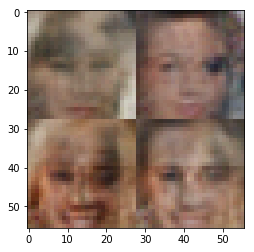

epoch:0 batch: 8020, genarator loss:3.580322, discriminator loss:0.413900
epoch:0 batch: 8040, genarator loss:4.626513, discriminator loss:0.373148
epoch:0 batch: 8060, genarator loss:0.199715, discriminator loss:2.120642
epoch:0 batch: 8080, genarator loss:5.658044, discriminator loss:0.375170
epoch:0 batch: 8100, genarator loss:3.543115, discriminator loss:0.419246
epoch:0 batch: 8120, genarator loss:1.581383, discriminator loss:0.669573
epoch:0 batch: 8140, genarator loss:2.123840, discriminator loss:0.535235
epoch:0 batch: 8160, genarator loss:4.759745, discriminator loss:0.359770
epoch:0 batch: 8180, genarator loss:3.880738, discriminator loss:0.377123
epoch:0 batch: 8200, genarator loss:1.450854, discriminator loss:0.727767


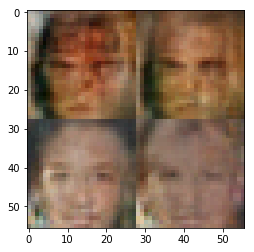

epoch:0 batch: 8220, genarator loss:1.744228, discriminator loss:0.730876
epoch:0 batch: 8240, genarator loss:6.545368, discriminator loss:0.495306
epoch:0 batch: 8260, genarator loss:2.683076, discriminator loss:0.441178
epoch:0 batch: 8280, genarator loss:1.728358, discriminator loss:0.572797
epoch:0 batch: 8300, genarator loss:2.893175, discriminator loss:0.423199
epoch:0 batch: 8320, genarator loss:3.159977, discriminator loss:0.440559
epoch:0 batch: 8340, genarator loss:5.334310, discriminator loss:0.346086
epoch:0 batch: 8360, genarator loss:2.588829, discriminator loss:0.449270
epoch:0 batch: 8380, genarator loss:4.378318, discriminator loss:0.400254
epoch:0 batch: 8400, genarator loss:1.501847, discriminator loss:0.834828


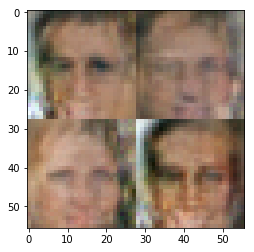

epoch:0 batch: 8420, genarator loss:4.378333, discriminator loss:0.366102
epoch:0 batch: 8440, genarator loss:4.340298, discriminator loss:0.483372
epoch:0 batch: 8460, genarator loss:3.932219, discriminator loss:0.363496
epoch:0 batch: 8480, genarator loss:4.725496, discriminator loss:0.350625
epoch:0 batch: 8500, genarator loss:4.336583, discriminator loss:0.368849
epoch:0 batch: 8520, genarator loss:4.798820, discriminator loss:0.408023
epoch:0 batch: 8540, genarator loss:3.995328, discriminator loss:0.377617
epoch:0 batch: 8560, genarator loss:5.915652, discriminator loss:0.349200
epoch:0 batch: 8580, genarator loss:2.562836, discriminator loss:0.440956
epoch:0 batch: 8600, genarator loss:2.684994, discriminator loss:0.505790


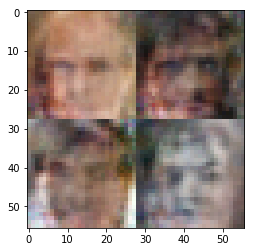

epoch:0 batch: 8620, genarator loss:6.434120, discriminator loss:0.369402
epoch:0 batch: 8640, genarator loss:5.520466, discriminator loss:0.378051
epoch:0 batch: 8660, genarator loss:4.133133, discriminator loss:0.367278
epoch:0 batch: 8680, genarator loss:6.172810, discriminator loss:0.440352
epoch:0 batch: 8700, genarator loss:5.277231, discriminator loss:0.357022
epoch:0 batch: 8720, genarator loss:2.110681, discriminator loss:0.551648
epoch:0 batch: 8740, genarator loss:2.077639, discriminator loss:0.523615
epoch:0 batch: 8760, genarator loss:0.894318, discriminator loss:1.076919
epoch:0 batch: 8780, genarator loss:1.821040, discriminator loss:0.566020
epoch:0 batch: 8800, genarator loss:1.617834, discriminator loss:0.777441


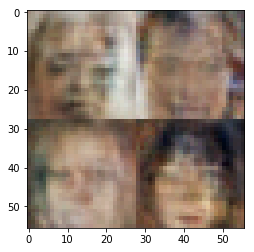

epoch:0 batch: 8820, genarator loss:1.719151, discriminator loss:0.548593
epoch:0 batch: 8840, genarator loss:2.754558, discriminator loss:0.421865
epoch:0 batch: 8860, genarator loss:1.850928, discriminator loss:0.543561
epoch:0 batch: 8880, genarator loss:2.702993, discriminator loss:0.466993
epoch:0 batch: 8900, genarator loss:2.114750, discriminator loss:0.509154
epoch:0 batch: 8920, genarator loss:4.602161, discriminator loss:0.396965
epoch:0 batch: 8940, genarator loss:1.840886, discriminator loss:0.630849
epoch:0 batch: 8960, genarator loss:2.026251, discriminator loss:0.507258
epoch:0 batch: 8980, genarator loss:4.896340, discriminator loss:0.417202
epoch:0 batch: 9000, genarator loss:1.595271, discriminator loss:0.641155


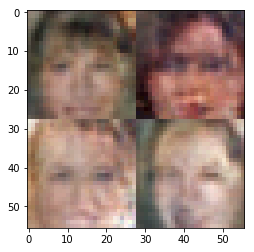

epoch:0 batch: 9020, genarator loss:7.219698, discriminator loss:0.353383
epoch:0 batch: 9040, genarator loss:7.268935, discriminator loss:0.332296
epoch:0 batch: 9060, genarator loss:2.061538, discriminator loss:0.679947
epoch:0 batch: 9080, genarator loss:1.909697, discriminator loss:0.593833
epoch:0 batch: 9100, genarator loss:4.199798, discriminator loss:0.355522
epoch:0 batch: 9120, genarator loss:1.543091, discriminator loss:0.638394
epoch:0 batch: 9140, genarator loss:4.085680, discriminator loss:0.413623
epoch:0 batch: 9160, genarator loss:2.534559, discriminator loss:0.597165
epoch:0 batch: 9180, genarator loss:4.851394, discriminator loss:0.430699
epoch:0 batch: 9200, genarator loss:1.700325, discriminator loss:0.702807


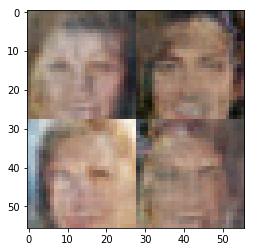

epoch:0 batch: 9220, genarator loss:1.136442, discriminator loss:0.783625
epoch:0 batch: 9240, genarator loss:4.284042, discriminator loss:0.397811
epoch:0 batch: 9260, genarator loss:1.135451, discriminator loss:0.820798
epoch:0 batch: 9280, genarator loss:0.751047, discriminator loss:1.120741
epoch:0 batch: 9300, genarator loss:2.410715, discriminator loss:0.481740
epoch:0 batch: 9320, genarator loss:1.783625, discriminator loss:0.661575
epoch:0 batch: 9340, genarator loss:3.454771, discriminator loss:0.418993
epoch:0 batch: 9360, genarator loss:1.322339, discriminator loss:0.704698
epoch:0 batch: 9380, genarator loss:2.817364, discriminator loss:0.449899
epoch:0 batch: 9400, genarator loss:0.775903, discriminator loss:1.110635


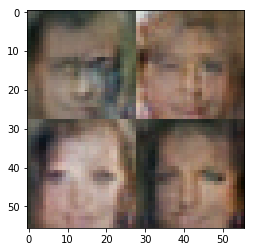

epoch:0 batch: 9420, genarator loss:1.696652, discriminator loss:0.627639
epoch:0 batch: 9440, genarator loss:2.478756, discriminator loss:0.530658
epoch:0 batch: 9460, genarator loss:1.216980, discriminator loss:0.795707
epoch:0 batch: 9480, genarator loss:3.116719, discriminator loss:0.439591
epoch:0 batch: 9500, genarator loss:3.804812, discriminator loss:0.369705
epoch:0 batch: 9520, genarator loss:1.685932, discriminator loss:0.617611
epoch:0 batch: 9540, genarator loss:1.859956, discriminator loss:0.631148
epoch:0 batch: 9560, genarator loss:2.997295, discriminator loss:0.400352
epoch:0 batch: 9580, genarator loss:1.832890, discriminator loss:0.587567
epoch:0 batch: 9600, genarator loss:5.004839, discriminator loss:0.368743


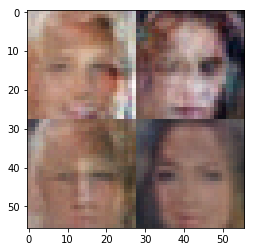

epoch:0 batch: 9620, genarator loss:2.081798, discriminator loss:0.617514
epoch:0 batch: 9640, genarator loss:8.259769, discriminator loss:0.365635
epoch:0 batch: 9660, genarator loss:1.681731, discriminator loss:0.557139
epoch:0 batch: 9680, genarator loss:4.974744, discriminator loss:0.373418
epoch:0 batch: 9700, genarator loss:3.400654, discriminator loss:0.420687
epoch:0 batch: 9720, genarator loss:2.250703, discriminator loss:0.614127
epoch:0 batch: 9740, genarator loss:4.145420, discriminator loss:0.364403
epoch:0 batch: 9760, genarator loss:3.803691, discriminator loss:0.387419
epoch:0 batch: 9780, genarator loss:8.506262, discriminator loss:0.335792
epoch:0 batch: 9800, genarator loss:1.633193, discriminator loss:0.642105


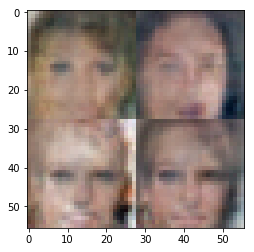

epoch:0 batch: 9820, genarator loss:3.856995, discriminator loss:0.421043
epoch:0 batch: 9840, genarator loss:0.829800, discriminator loss:0.987639
epoch:0 batch: 9860, genarator loss:3.610780, discriminator loss:0.387445
epoch:0 batch: 9880, genarator loss:1.038463, discriminator loss:1.008135
epoch:0 batch: 9900, genarator loss:1.097368, discriminator loss:0.959144
epoch:0 batch: 9920, genarator loss:1.460322, discriminator loss:0.721403
epoch:0 batch: 9940, genarator loss:5.115001, discriminator loss:0.423797
epoch:0 batch: 9960, genarator loss:1.257190, discriminator loss:0.839205
epoch:0 batch: 9980, genarator loss:5.557482, discriminator loss:0.371717
epoch:0 batch: 10000, genarator loss:1.386913, discriminator loss:0.697902


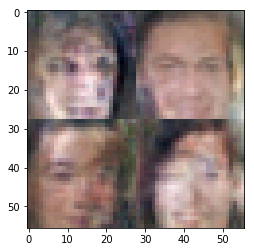

epoch:0 batch: 10020, genarator loss:1.860150, discriminator loss:0.566065
epoch:0 batch: 10040, genarator loss:2.356727, discriminator loss:0.481010
epoch:0 batch: 10060, genarator loss:4.002010, discriminator loss:0.436350
epoch:0 batch: 10080, genarator loss:1.532064, discriminator loss:0.613950
epoch:0 batch: 10100, genarator loss:5.071587, discriminator loss:0.341585
epoch:0 batch: 10120, genarator loss:3.060393, discriminator loss:0.577720
epoch:0 batch: 10140, genarator loss:2.639560, discriminator loss:0.452739
epoch:0 batch: 10160, genarator loss:3.754238, discriminator loss:0.412603
epoch:0 batch: 10180, genarator loss:2.106160, discriminator loss:0.495962
epoch:0 batch: 10200, genarator loss:2.121771, discriminator loss:0.501771


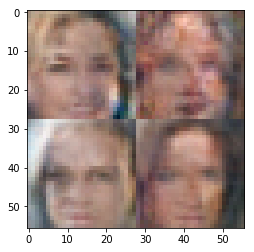

epoch:0 batch: 10220, genarator loss:2.233499, discriminator loss:0.517074
epoch:0 batch: 10240, genarator loss:3.932837, discriminator loss:0.457495
epoch:0 batch: 10260, genarator loss:1.077536, discriminator loss:1.007831
epoch:0 batch: 10280, genarator loss:3.845801, discriminator loss:0.381591
epoch:0 batch: 10300, genarator loss:1.628874, discriminator loss:0.615326
epoch:0 batch: 10320, genarator loss:5.108717, discriminator loss:0.348041
epoch:0 batch: 10340, genarator loss:2.350836, discriminator loss:0.516710
epoch:0 batch: 10360, genarator loss:3.675492, discriminator loss:0.396871
epoch:0 batch: 10380, genarator loss:1.237615, discriminator loss:0.928313
epoch:0 batch: 10400, genarator loss:2.245051, discriminator loss:0.504844


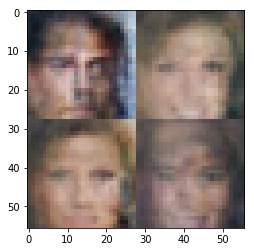

epoch:0 batch: 10420, genarator loss:2.131582, discriminator loss:0.536440
epoch:0 batch: 10440, genarator loss:4.840641, discriminator loss:0.365422
epoch:0 batch: 10460, genarator loss:1.405169, discriminator loss:0.675101
epoch:0 batch: 10480, genarator loss:1.832809, discriminator loss:0.610754
epoch:0 batch: 10500, genarator loss:5.119967, discriminator loss:0.364293
epoch:0 batch: 10520, genarator loss:1.188805, discriminator loss:0.803846
epoch:0 batch: 10540, genarator loss:5.001503, discriminator loss:0.352734
epoch:0 batch: 10560, genarator loss:1.989781, discriminator loss:0.546352
epoch:0 batch: 10580, genarator loss:3.409476, discriminator loss:0.498432
epoch:0 batch: 10600, genarator loss:1.787455, discriminator loss:0.629735


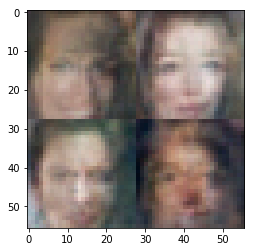

epoch:0 batch: 10620, genarator loss:0.661659, discriminator loss:1.549536
epoch:0 batch: 10640, genarator loss:3.374697, discriminator loss:0.383132
epoch:0 batch: 10660, genarator loss:5.226527, discriminator loss:0.346584
epoch:0 batch: 10680, genarator loss:2.238155, discriminator loss:0.504492
epoch:0 batch: 10700, genarator loss:1.031869, discriminator loss:0.809254
epoch:0 batch: 10720, genarator loss:1.863605, discriminator loss:0.676843
epoch:0 batch: 10740, genarator loss:2.313384, discriminator loss:0.575792
epoch:0 batch: 10760, genarator loss:3.233879, discriminator loss:0.440336
epoch:0 batch: 10780, genarator loss:1.482522, discriminator loss:0.711754
epoch:0 batch: 10800, genarator loss:3.178636, discriminator loss:0.435514


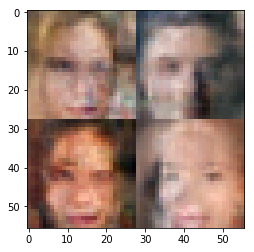

epoch:0 batch: 10820, genarator loss:2.256728, discriminator loss:0.497617
epoch:0 batch: 10840, genarator loss:6.428591, discriminator loss:0.556503
epoch:0 batch: 10860, genarator loss:2.254847, discriminator loss:0.562509
epoch:0 batch: 10880, genarator loss:3.206412, discriminator loss:0.426842
epoch:0 batch: 10900, genarator loss:1.102284, discriminator loss:0.827804
epoch:0 batch: 10920, genarator loss:2.082397, discriminator loss:0.559450
epoch:0 batch: 10940, genarator loss:1.891532, discriminator loss:0.516999
epoch:0 batch: 10960, genarator loss:3.007417, discriminator loss:0.434778
epoch:0 batch: 10980, genarator loss:3.748564, discriminator loss:0.402920
epoch:0 batch: 11000, genarator loss:4.319532, discriminator loss:0.397046


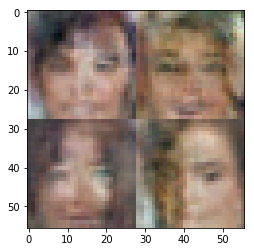

epoch:0 batch: 11020, genarator loss:1.426972, discriminator loss:0.657712
epoch:0 batch: 11040, genarator loss:1.003467, discriminator loss:0.905595
epoch:0 batch: 11060, genarator loss:3.931631, discriminator loss:0.396804
epoch:0 batch: 11080, genarator loss:1.891857, discriminator loss:0.622530
epoch:0 batch: 11100, genarator loss:3.523700, discriminator loss:0.422355
epoch:0 batch: 11120, genarator loss:0.749663, discriminator loss:1.269014
epoch:0 batch: 11140, genarator loss:7.347897, discriminator loss:0.342317
epoch:0 batch: 11160, genarator loss:4.579440, discriminator loss:0.382466
epoch:0 batch: 11180, genarator loss:0.797083, discriminator loss:1.060595
epoch:0 batch: 11200, genarator loss:0.766834, discriminator loss:1.079097


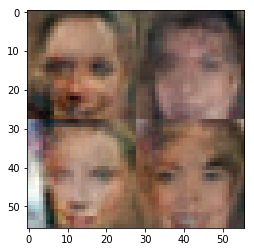

epoch:0 batch: 11220, genarator loss:1.460538, discriminator loss:0.637309
epoch:0 batch: 11240, genarator loss:0.942898, discriminator loss:0.901245
epoch:0 batch: 11260, genarator loss:2.396026, discriminator loss:0.443515
epoch:0 batch: 11280, genarator loss:0.525024, discriminator loss:1.402411
epoch:0 batch: 11300, genarator loss:2.724760, discriminator loss:0.446930
epoch:0 batch: 11320, genarator loss:2.206165, discriminator loss:0.517453
epoch:0 batch: 11340, genarator loss:3.420475, discriminator loss:0.449088
epoch:0 batch: 11360, genarator loss:2.515971, discriminator loss:0.462211
epoch:0 batch: 11380, genarator loss:0.922534, discriminator loss:1.059170
epoch:0 batch: 11400, genarator loss:2.305030, discriminator loss:0.599496


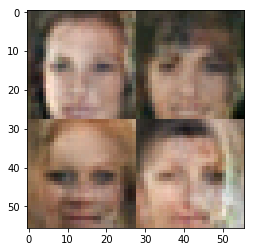

epoch:0 batch: 11420, genarator loss:2.269434, discriminator loss:0.507560
epoch:0 batch: 11440, genarator loss:0.895747, discriminator loss:1.080015
epoch:0 batch: 11460, genarator loss:7.083106, discriminator loss:0.591957
epoch:0 batch: 11480, genarator loss:2.118282, discriminator loss:0.511910
epoch:0 batch: 11500, genarator loss:2.417083, discriminator loss:0.493276
epoch:0 batch: 11520, genarator loss:1.260124, discriminator loss:0.761339
epoch:0 batch: 11540, genarator loss:3.747816, discriminator loss:0.440871
epoch:0 batch: 11560, genarator loss:2.203280, discriminator loss:0.511120
epoch:0 batch: 11580, genarator loss:3.664693, discriminator loss:0.423644
epoch:0 batch: 11600, genarator loss:2.349027, discriminator loss:0.517102


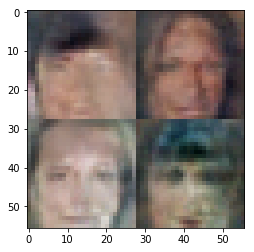

epoch:0 batch: 11620, genarator loss:2.711365, discriminator loss:0.438862
epoch:0 batch: 11640, genarator loss:1.391632, discriminator loss:0.739191
epoch:0 batch: 11660, genarator loss:2.845031, discriminator loss:0.482534
epoch:0 batch: 11680, genarator loss:2.458102, discriminator loss:0.551216
epoch:0 batch: 11700, genarator loss:5.548322, discriminator loss:1.269006
epoch:0 batch: 11720, genarator loss:2.784375, discriminator loss:0.426093
epoch:0 batch: 11740, genarator loss:2.900651, discriminator loss:0.452748
epoch:0 batch: 11760, genarator loss:3.810544, discriminator loss:0.369657
epoch:0 batch: 11780, genarator loss:2.494106, discriminator loss:0.509059
epoch:0 batch: 11800, genarator loss:2.684749, discriminator loss:0.444047


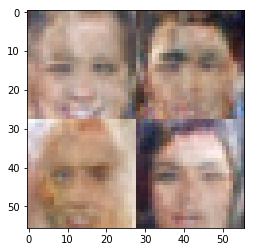

epoch:0 batch: 11820, genarator loss:1.113494, discriminator loss:0.824931
epoch:0 batch: 11840, genarator loss:1.544182, discriminator loss:0.897645
epoch:0 batch: 11860, genarator loss:0.469916, discriminator loss:1.464201
epoch:0 batch: 11880, genarator loss:2.922430, discriminator loss:0.439869
epoch:0 batch: 11900, genarator loss:3.199919, discriminator loss:0.416935
epoch:0 batch: 11920, genarator loss:0.858616, discriminator loss:1.334024
epoch:0 batch: 11940, genarator loss:2.389010, discriminator loss:0.539884
epoch:0 batch: 11960, genarator loss:0.771703, discriminator loss:1.210047
epoch:0 batch: 11980, genarator loss:2.345184, discriminator loss:0.500856
epoch:0 batch: 12000, genarator loss:1.806937, discriminator loss:0.564296


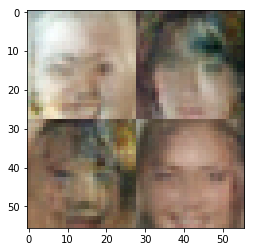

epoch:0 batch: 12020, genarator loss:2.765935, discriminator loss:0.424134
epoch:0 batch: 12040, genarator loss:4.134861, discriminator loss:0.368370
epoch:0 batch: 12060, genarator loss:2.066177, discriminator loss:0.517177
epoch:0 batch: 12080, genarator loss:3.875353, discriminator loss:0.458369
epoch:0 batch: 12100, genarator loss:0.412239, discriminator loss:1.771117
epoch:0 batch: 12120, genarator loss:3.695324, discriminator loss:0.364906
epoch:0 batch: 12140, genarator loss:0.684723, discriminator loss:1.320813
epoch:0 batch: 12160, genarator loss:4.680725, discriminator loss:0.360658
epoch:0 batch: 12180, genarator loss:1.981476, discriminator loss:0.534580
epoch:0 batch: 12200, genarator loss:2.153358, discriminator loss:0.514822


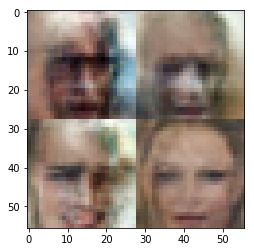

epoch:0 batch: 12220, genarator loss:2.053132, discriminator loss:0.544803
epoch:0 batch: 12240, genarator loss:2.242118, discriminator loss:0.493216
epoch:0 batch: 12260, genarator loss:1.408496, discriminator loss:0.882046
epoch:0 batch: 12280, genarator loss:1.608217, discriminator loss:0.653757
epoch:0 batch: 12300, genarator loss:2.185443, discriminator loss:0.504609
epoch:0 batch: 12320, genarator loss:3.161080, discriminator loss:0.434147
epoch:0 batch: 12340, genarator loss:1.447713, discriminator loss:0.652021
epoch:0 batch: 12360, genarator loss:0.633345, discriminator loss:1.190708
epoch:0 batch: 12380, genarator loss:2.305636, discriminator loss:0.494501
epoch:0 batch: 12400, genarator loss:3.328544, discriminator loss:0.436883


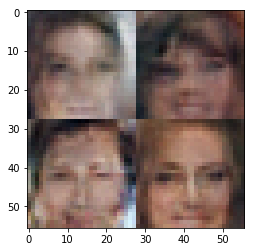

epoch:0 batch: 12420, genarator loss:1.390930, discriminator loss:0.637522
epoch:0 batch: 12440, genarator loss:4.375969, discriminator loss:0.396835
epoch:0 batch: 12460, genarator loss:4.461311, discriminator loss:0.369730
epoch:0 batch: 12480, genarator loss:4.259085, discriminator loss:0.434156
epoch:0 batch: 12500, genarator loss:1.394446, discriminator loss:0.706361
epoch:0 batch: 12520, genarator loss:1.166095, discriminator loss:0.907127
epoch:0 batch: 12540, genarator loss:1.671178, discriminator loss:0.614161
epoch:0 batch: 12560, genarator loss:3.129643, discriminator loss:0.442993
epoch:0 batch: 12580, genarator loss:1.056352, discriminator loss:0.859049
epoch:0 batch: 12600, genarator loss:1.358868, discriminator loss:0.738524


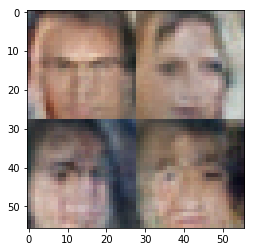

epoch:0 batch: 12620, genarator loss:2.238181, discriminator loss:0.509531
epoch:0 batch: 12640, genarator loss:3.329729, discriminator loss:0.476518
epoch:0 batch: 12660, genarator loss:3.155740, discriminator loss:0.397973
epoch:0 batch: 12680, genarator loss:0.675451, discriminator loss:1.158784
epoch:0 batch: 12700, genarator loss:1.427355, discriminator loss:0.707472
epoch:0 batch: 12720, genarator loss:2.435300, discriminator loss:0.468327
epoch:0 batch: 12740, genarator loss:2.327862, discriminator loss:0.536546
epoch:0 batch: 12760, genarator loss:2.877518, discriminator loss:0.439662
epoch:0 batch: 12780, genarator loss:2.605759, discriminator loss:0.443395
epoch:0 batch: 12800, genarator loss:0.649902, discriminator loss:1.370851


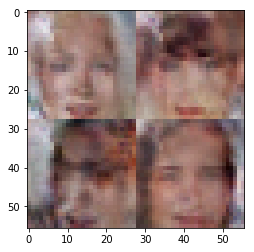

epoch:0 batch: 12820, genarator loss:1.390950, discriminator loss:0.674587
epoch:0 batch: 12840, genarator loss:6.972473, discriminator loss:0.361396
epoch:0 batch: 12860, genarator loss:2.856342, discriminator loss:0.446086
epoch:0 batch: 12880, genarator loss:1.970733, discriminator loss:0.559456
epoch:0 batch: 12900, genarator loss:4.943421, discriminator loss:0.425544
epoch:0 batch: 12920, genarator loss:0.814178, discriminator loss:1.129856
epoch:0 batch: 12940, genarator loss:3.740612, discriminator loss:0.396784
epoch:0 batch: 12960, genarator loss:2.882737, discriminator loss:0.447405
epoch:0 batch: 12980, genarator loss:3.761945, discriminator loss:0.422229
epoch:0 batch: 13000, genarator loss:2.099591, discriminator loss:0.521248


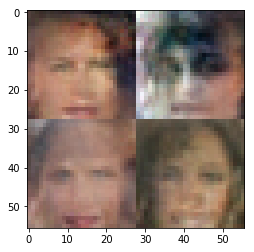

epoch:0 batch: 13020, genarator loss:1.077268, discriminator loss:0.877317
epoch:0 batch: 13040, genarator loss:0.647234, discriminator loss:1.258171
epoch:0 batch: 13060, genarator loss:1.103995, discriminator loss:0.839639
epoch:0 batch: 13080, genarator loss:2.259598, discriminator loss:0.500500
epoch:0 batch: 13100, genarator loss:1.571521, discriminator loss:0.612599
epoch:0 batch: 13120, genarator loss:2.448166, discriminator loss:0.446932
epoch:0 batch: 13140, genarator loss:2.577649, discriminator loss:0.499138
epoch:0 batch: 13160, genarator loss:8.445245, discriminator loss:0.357723
epoch:0 batch: 13180, genarator loss:1.045920, discriminator loss:0.832301
epoch:0 batch: 13200, genarator loss:4.318736, discriminator loss:0.380238


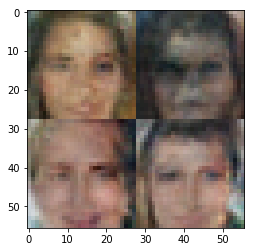

epoch:0 batch: 13220, genarator loss:1.751922, discriminator loss:0.592342
epoch:0 batch: 13240, genarator loss:2.694041, discriminator loss:0.471982
epoch:0 batch: 13260, genarator loss:2.533156, discriminator loss:0.501122
epoch:0 batch: 13280, genarator loss:1.318852, discriminator loss:0.811298
epoch:0 batch: 13300, genarator loss:1.637769, discriminator loss:0.663525
epoch:0 batch: 13320, genarator loss:1.574207, discriminator loss:0.624716
epoch:0 batch: 13340, genarator loss:3.111605, discriminator loss:0.468490
epoch:0 batch: 13360, genarator loss:2.367650, discriminator loss:0.497774
epoch:0 batch: 13380, genarator loss:1.010552, discriminator loss:0.834252
epoch:0 batch: 13400, genarator loss:2.534123, discriminator loss:0.647653


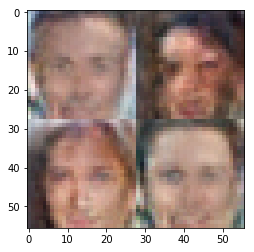

epoch:0 batch: 13420, genarator loss:1.861428, discriminator loss:0.598679
epoch:0 batch: 13440, genarator loss:0.692517, discriminator loss:1.224912
epoch:0 batch: 13460, genarator loss:1.610245, discriminator loss:0.642717
epoch:0 batch: 13480, genarator loss:1.881479, discriminator loss:0.576977
epoch:0 batch: 13500, genarator loss:2.944221, discriminator loss:0.448745
epoch:0 batch: 13520, genarator loss:1.070488, discriminator loss:0.846067
epoch:0 batch: 13540, genarator loss:1.612775, discriminator loss:0.587721
epoch:0 batch: 13560, genarator loss:1.339303, discriminator loss:0.968050
epoch:0 batch: 13580, genarator loss:1.470058, discriminator loss:0.689329
epoch:0 batch: 13600, genarator loss:1.169742, discriminator loss:0.774784


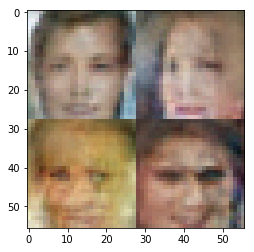

epoch:0 batch: 13620, genarator loss:2.503226, discriminator loss:0.524268
epoch:0 batch: 13640, genarator loss:1.494421, discriminator loss:0.748930
epoch:0 batch: 13660, genarator loss:1.651582, discriminator loss:0.592668
epoch:0 batch: 13680, genarator loss:1.543828, discriminator loss:0.661487
epoch:0 batch: 13700, genarator loss:2.455899, discriminator loss:0.477073
epoch:0 batch: 13720, genarator loss:3.244839, discriminator loss:0.393828
epoch:0 batch: 13740, genarator loss:1.217010, discriminator loss:1.024880
epoch:0 batch: 13760, genarator loss:1.503557, discriminator loss:0.637519
epoch:0 batch: 13780, genarator loss:2.704317, discriminator loss:0.420117
epoch:0 batch: 13800, genarator loss:1.530692, discriminator loss:0.727917


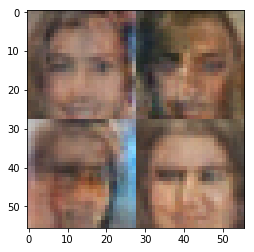

epoch:0 batch: 13820, genarator loss:1.504067, discriminator loss:0.667708
epoch:0 batch: 13840, genarator loss:3.377783, discriminator loss:0.491003
epoch:0 batch: 13860, genarator loss:5.767934, discriminator loss:0.355076
epoch:0 batch: 13880, genarator loss:0.915739, discriminator loss:0.915809
epoch:0 batch: 13900, genarator loss:4.367835, discriminator loss:0.377549
epoch:0 batch: 13920, genarator loss:2.616192, discriminator loss:0.468100
epoch:0 batch: 13940, genarator loss:0.603369, discriminator loss:1.162205
epoch:0 batch: 13960, genarator loss:3.567023, discriminator loss:0.391158
epoch:0 batch: 13980, genarator loss:1.389247, discriminator loss:0.676139
epoch:0 batch: 14000, genarator loss:1.305132, discriminator loss:0.700322


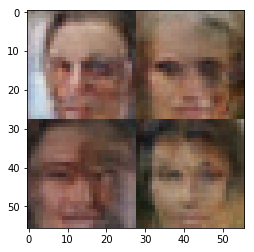

epoch:0 batch: 14020, genarator loss:1.850030, discriminator loss:0.629873
epoch:0 batch: 14040, genarator loss:3.566602, discriminator loss:0.398394
epoch:0 batch: 14060, genarator loss:1.535070, discriminator loss:0.695723
epoch:0 batch: 14080, genarator loss:3.069706, discriminator loss:0.461222
epoch:0 batch: 14100, genarator loss:1.389304, discriminator loss:0.659327
epoch:0 batch: 14120, genarator loss:1.544061, discriminator loss:0.721179
epoch:0 batch: 14140, genarator loss:2.641517, discriminator loss:0.441685
epoch:0 batch: 14160, genarator loss:2.497861, discriminator loss:0.451585
epoch:0 batch: 14180, genarator loss:0.943962, discriminator loss:0.904404
epoch:0 batch: 14200, genarator loss:0.529618, discriminator loss:1.325803


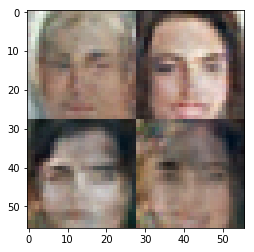

epoch:0 batch: 14220, genarator loss:4.210758, discriminator loss:0.381482
epoch:0 batch: 14240, genarator loss:2.930804, discriminator loss:0.549441
epoch:0 batch: 14260, genarator loss:2.259126, discriminator loss:0.476883
epoch:0 batch: 14280, genarator loss:3.844021, discriminator loss:0.381787
epoch:0 batch: 14300, genarator loss:3.308999, discriminator loss:0.396475
epoch:0 batch: 14320, genarator loss:1.642180, discriminator loss:0.613320
epoch:0 batch: 14340, genarator loss:2.662282, discriminator loss:0.567256
epoch:0 batch: 14360, genarator loss:1.092880, discriminator loss:0.856959
epoch:0 batch: 14380, genarator loss:4.367534, discriminator loss:0.378579
epoch:0 batch: 14400, genarator loss:1.229028, discriminator loss:0.769130


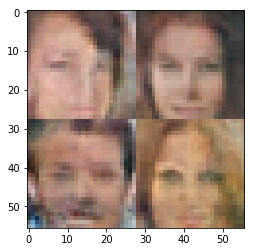

epoch:0 batch: 14420, genarator loss:2.232878, discriminator loss:0.566260
epoch:0 batch: 14440, genarator loss:0.678405, discriminator loss:1.265376
epoch:0 batch: 14460, genarator loss:4.349288, discriminator loss:0.555178
epoch:0 batch: 14480, genarator loss:0.343452, discriminator loss:1.675287
epoch:0 batch: 14500, genarator loss:1.240393, discriminator loss:0.877703
epoch:0 batch: 14520, genarator loss:1.699741, discriminator loss:0.557564
epoch:0 batch: 14540, genarator loss:1.258308, discriminator loss:0.735392
epoch:0 batch: 14560, genarator loss:2.059708, discriminator loss:0.558173
epoch:0 batch: 14580, genarator loss:0.714734, discriminator loss:1.442171
epoch:0 batch: 14600, genarator loss:3.612482, discriminator loss:0.416864


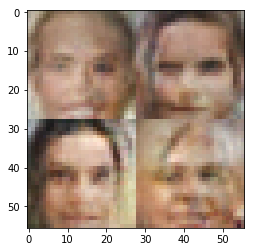

epoch:0 batch: 14620, genarator loss:0.664723, discriminator loss:1.283251
epoch:0 batch: 14640, genarator loss:1.507376, discriminator loss:0.623326
epoch:0 batch: 14660, genarator loss:3.552780, discriminator loss:0.396023
epoch:0 batch: 14680, genarator loss:2.270407, discriminator loss:0.499006
epoch:0 batch: 14700, genarator loss:1.220682, discriminator loss:1.022434
epoch:0 batch: 14720, genarator loss:0.664554, discriminator loss:1.244698
epoch:0 batch: 14740, genarator loss:1.611963, discriminator loss:0.612994
epoch:0 batch: 14760, genarator loss:2.033676, discriminator loss:0.518041
epoch:0 batch: 14780, genarator loss:1.510053, discriminator loss:0.674895
epoch:0 batch: 14800, genarator loss:0.688790, discriminator loss:1.163865


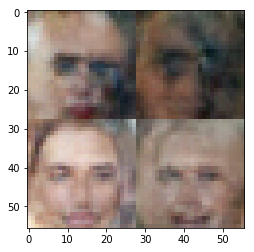

epoch:0 batch: 14820, genarator loss:2.506348, discriminator loss:0.479925
epoch:0 batch: 14840, genarator loss:1.813972, discriminator loss:0.668851
epoch:0 batch: 14860, genarator loss:1.032838, discriminator loss:0.960622
epoch:0 batch: 14880, genarator loss:2.744488, discriminator loss:0.436385
epoch:0 batch: 14900, genarator loss:0.690827, discriminator loss:1.406837
epoch:0 batch: 14920, genarator loss:1.750401, discriminator loss:0.627375
epoch:0 batch: 14940, genarator loss:2.798690, discriminator loss:0.417230
epoch:0 batch: 14960, genarator loss:2.589116, discriminator loss:0.458490
epoch:0 batch: 14980, genarator loss:5.737250, discriminator loss:0.352314
epoch:0 batch: 15000, genarator loss:0.398358, discriminator loss:1.678729


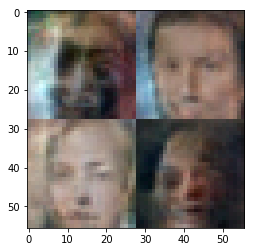

epoch:0 batch: 15020, genarator loss:1.098866, discriminator loss:0.845635
epoch:0 batch: 15040, genarator loss:0.977527, discriminator loss:0.903679
epoch:0 batch: 15060, genarator loss:1.889683, discriminator loss:0.580252
epoch:0 batch: 15080, genarator loss:1.477585, discriminator loss:0.689792
epoch:0 batch: 15100, genarator loss:1.852100, discriminator loss:0.622162
epoch:0 batch: 16280, genarator loss:2.222430, discriminator loss:0.578220
epoch:0 batch: 16300, genarator loss:1.136117, discriminator loss:0.785582
epoch:0 batch: 16320, genarator loss:1.982663, discriminator loss:0.560461
epoch:0 batch: 16340, genarator loss:0.643907, discriminator loss:1.148196
epoch:0 batch: 16360, genarator loss:2.842348, discriminator loss:0.460495
epoch:0 batch: 16380, genarator loss:2.226098, discriminator loss:0.528851
epoch:0 batch: 16400, genarator loss:2.936404, discriminator loss:0.481316


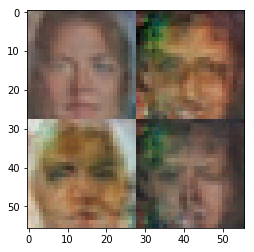

epoch:0 batch: 16420, genarator loss:1.885732, discriminator loss:0.590943
epoch:0 batch: 16440, genarator loss:1.914862, discriminator loss:0.623907
epoch:0 batch: 16460, genarator loss:1.482596, discriminator loss:0.702192
epoch:0 batch: 16480, genarator loss:1.090510, discriminator loss:0.869895
epoch:0 batch: 16500, genarator loss:4.063935, discriminator loss:0.383502
epoch:0 batch: 16520, genarator loss:1.869562, discriminator loss:0.595174
epoch:0 batch: 16540, genarator loss:2.782946, discriminator loss:0.454660
epoch:0 batch: 16560, genarator loss:2.340827, discriminator loss:0.528991
epoch:0 batch: 16580, genarator loss:2.229279, discriminator loss:0.501523
epoch:0 batch: 16600, genarator loss:2.634847, discriminator loss:0.462083


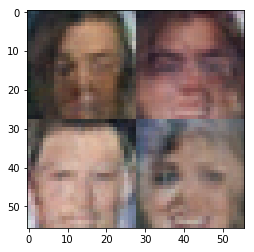

epoch:0 batch: 16620, genarator loss:2.681690, discriminator loss:0.499051
epoch:0 batch: 16640, genarator loss:1.995161, discriminator loss:0.630306
epoch:0 batch: 16660, genarator loss:3.224260, discriminator loss:0.907389
epoch:0 batch: 16680, genarator loss:1.061245, discriminator loss:0.933717
epoch:0 batch: 16700, genarator loss:2.049607, discriminator loss:0.557595
epoch:0 batch: 16720, genarator loss:3.188639, discriminator loss:0.545206
epoch:0 batch: 16740, genarator loss:1.210678, discriminator loss:0.758675
epoch:0 batch: 16760, genarator loss:1.192434, discriminator loss:0.826365
epoch:0 batch: 16780, genarator loss:2.490504, discriminator loss:0.469547
epoch:0 batch: 16800, genarator loss:1.271894, discriminator loss:0.714795


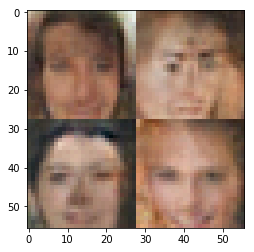

epoch:0 batch: 16820, genarator loss:1.403615, discriminator loss:0.681695
epoch:0 batch: 16840, genarator loss:1.109543, discriminator loss:0.787129
epoch:0 batch: 16860, genarator loss:0.969744, discriminator loss:0.906075
epoch:0 batch: 16880, genarator loss:2.349938, discriminator loss:0.499305
epoch:0 batch: 16900, genarator loss:5.098370, discriminator loss:0.485903
epoch:0 batch: 16920, genarator loss:1.301306, discriminator loss:0.859671
epoch:0 batch: 16940, genarator loss:2.855800, discriminator loss:0.487949
epoch:0 batch: 16960, genarator loss:2.042399, discriminator loss:0.634982
epoch:0 batch: 16980, genarator loss:2.317968, discriminator loss:0.493809
epoch:0 batch: 17000, genarator loss:1.976676, discriminator loss:0.526152


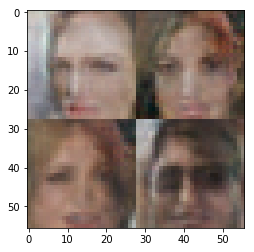

epoch:0 batch: 17020, genarator loss:0.702402, discriminator loss:1.283451
epoch:0 batch: 17040, genarator loss:0.670056, discriminator loss:1.128844
epoch:0 batch: 17060, genarator loss:0.698892, discriminator loss:1.184001
epoch:0 batch: 17080, genarator loss:1.527895, discriminator loss:0.719516
epoch:0 batch: 17100, genarator loss:3.343951, discriminator loss:0.389117
epoch:0 batch: 17120, genarator loss:2.132784, discriminator loss:0.588950
epoch:0 batch: 17140, genarator loss:1.072082, discriminator loss:0.864195
epoch:0 batch: 17160, genarator loss:1.460163, discriminator loss:0.804533
epoch:0 batch: 17180, genarator loss:1.330402, discriminator loss:1.050746
epoch:0 batch: 17200, genarator loss:2.243512, discriminator loss:0.487250


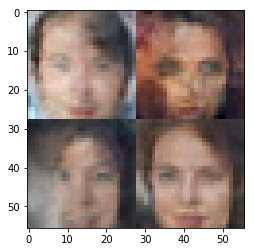

epoch:0 batch: 17220, genarator loss:1.234192, discriminator loss:0.762230
epoch:0 batch: 17240, genarator loss:1.261544, discriminator loss:0.753191
epoch:0 batch: 17260, genarator loss:3.715697, discriminator loss:0.392192
epoch:0 batch: 17280, genarator loss:1.572080, discriminator loss:0.665355
epoch:0 batch: 17300, genarator loss:4.920233, discriminator loss:0.404146
epoch:0 batch: 17320, genarator loss:0.968641, discriminator loss:0.923363
epoch:0 batch: 17340, genarator loss:1.972348, discriminator loss:0.574184
epoch:0 batch: 17360, genarator loss:3.958124, discriminator loss:0.378920
epoch:0 batch: 17380, genarator loss:2.481230, discriminator loss:0.506307
epoch:0 batch: 17400, genarator loss:0.861731, discriminator loss:1.013808


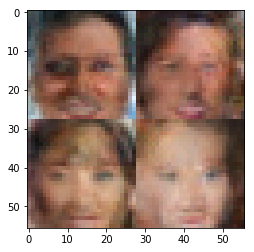

epoch:0 batch: 17420, genarator loss:1.778835, discriminator loss:0.623236
epoch:0 batch: 17440, genarator loss:1.942047, discriminator loss:0.533967
epoch:0 batch: 17460, genarator loss:2.139199, discriminator loss:0.507915
epoch:0 batch: 17480, genarator loss:1.372134, discriminator loss:0.697454
epoch:0 batch: 17500, genarator loss:0.539168, discriminator loss:1.417861
epoch:0 batch: 17520, genarator loss:1.372822, discriminator loss:0.693107
epoch:0 batch: 17540, genarator loss:1.264443, discriminator loss:0.738656
epoch:0 batch: 17560, genarator loss:2.106473, discriminator loss:0.531848
epoch:0 batch: 17580, genarator loss:0.599847, discriminator loss:1.164551
epoch:0 batch: 17600, genarator loss:1.916923, discriminator loss:0.564135


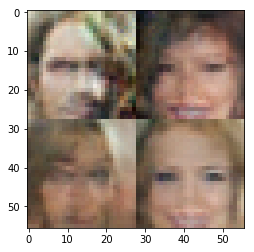

epoch:0 batch: 17620, genarator loss:0.305665, discriminator loss:1.877212
epoch:0 batch: 17640, genarator loss:1.206390, discriminator loss:0.744194
epoch:0 batch: 17660, genarator loss:2.222569, discriminator loss:0.533086
epoch:0 batch: 17680, genarator loss:4.692058, discriminator loss:0.370517
epoch:0 batch: 17700, genarator loss:3.662686, discriminator loss:0.405554
epoch:0 batch: 17720, genarator loss:3.804823, discriminator loss:0.366458
epoch:0 batch: 17740, genarator loss:2.066433, discriminator loss:0.522271
epoch:0 batch: 17760, genarator loss:0.989051, discriminator loss:0.882011
epoch:0 batch: 17780, genarator loss:0.701588, discriminator loss:1.160140
epoch:0 batch: 17800, genarator loss:3.532627, discriminator loss:0.549985


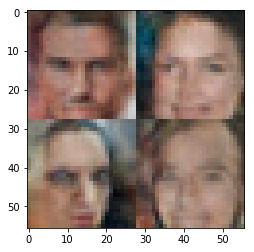

epoch:0 batch: 17820, genarator loss:1.423784, discriminator loss:0.650295
epoch:0 batch: 17840, genarator loss:1.902968, discriminator loss:0.594997
epoch:0 batch: 17860, genarator loss:1.040391, discriminator loss:0.884523
epoch:0 batch: 17880, genarator loss:0.949738, discriminator loss:0.917332
epoch:0 batch: 17900, genarator loss:1.532147, discriminator loss:0.708541
epoch:0 batch: 17920, genarator loss:2.190771, discriminator loss:0.529998
epoch:0 batch: 17940, genarator loss:0.298150, discriminator loss:1.986629
epoch:0 batch: 17960, genarator loss:4.145813, discriminator loss:0.368910
epoch:0 batch: 17980, genarator loss:1.559938, discriminator loss:0.730257
epoch:0 batch: 18000, genarator loss:1.896913, discriminator loss:0.553210


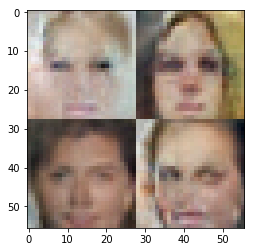

epoch:0 batch: 18020, genarator loss:2.189726, discriminator loss:0.499950
epoch:0 batch: 18040, genarator loss:2.969809, discriminator loss:0.435178
epoch:0 batch: 18060, genarator loss:1.428746, discriminator loss:0.676469
epoch:0 batch: 18080, genarator loss:2.243381, discriminator loss:0.517217
epoch:0 batch: 18100, genarator loss:1.001568, discriminator loss:0.898942
epoch:0 batch: 18120, genarator loss:2.253281, discriminator loss:0.529321
epoch:0 batch: 18140, genarator loss:3.032462, discriminator loss:0.424393
epoch:0 batch: 18160, genarator loss:4.419590, discriminator loss:0.383323
epoch:0 batch: 18180, genarator loss:0.848024, discriminator loss:1.063282
epoch:0 batch: 18200, genarator loss:2.943667, discriminator loss:0.444029


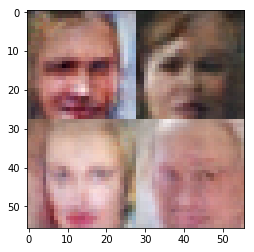

epoch:0 batch: 18220, genarator loss:2.312470, discriminator loss:0.479276
epoch:0 batch: 18240, genarator loss:0.546869, discriminator loss:1.399495
epoch:0 batch: 18260, genarator loss:1.305343, discriminator loss:0.695043
epoch:0 batch: 18280, genarator loss:3.083576, discriminator loss:0.414424
epoch:0 batch: 18300, genarator loss:1.611910, discriminator loss:0.689836
epoch:0 batch: 18320, genarator loss:5.544696, discriminator loss:0.363950
epoch:0 batch: 18340, genarator loss:8.148087, discriminator loss:0.362682
epoch:0 batch: 18360, genarator loss:0.137183, discriminator loss:2.714895
epoch:0 batch: 18380, genarator loss:1.635382, discriminator loss:0.634279
epoch:0 batch: 18400, genarator loss:1.522328, discriminator loss:0.653781


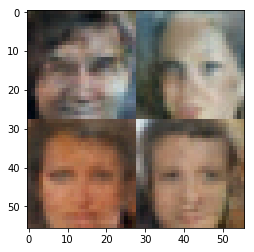

epoch:0 batch: 18420, genarator loss:1.601667, discriminator loss:0.623554
epoch:0 batch: 18440, genarator loss:2.532683, discriminator loss:0.459987
epoch:0 batch: 18460, genarator loss:1.898228, discriminator loss:0.535305
epoch:0 batch: 18480, genarator loss:0.286244, discriminator loss:2.040756
epoch:0 batch: 18500, genarator loss:2.717427, discriminator loss:0.621144
epoch:0 batch: 18520, genarator loss:2.543859, discriminator loss:0.535688
epoch:0 batch: 18540, genarator loss:1.143052, discriminator loss:0.832705
epoch:0 batch: 18560, genarator loss:2.713755, discriminator loss:0.468872
epoch:0 batch: 18580, genarator loss:1.846549, discriminator loss:0.542494
epoch:0 batch: 18600, genarator loss:1.992937, discriminator loss:0.587328


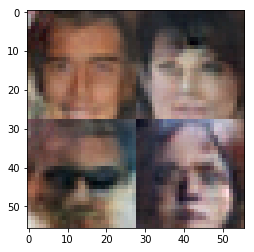

epoch:0 batch: 18620, genarator loss:1.445255, discriminator loss:0.667065
epoch:0 batch: 18640, genarator loss:5.903107, discriminator loss:0.349290
epoch:0 batch: 18660, genarator loss:2.935524, discriminator loss:0.454227
epoch:0 batch: 18680, genarator loss:1.277993, discriminator loss:0.757689
epoch:0 batch: 18700, genarator loss:5.972122, discriminator loss:0.388571
epoch:0 batch: 18720, genarator loss:1.861426, discriminator loss:0.588985
epoch:0 batch: 18740, genarator loss:4.481709, discriminator loss:0.380736
epoch:0 batch: 18760, genarator loss:0.509854, discriminator loss:1.287019
epoch:0 batch: 18780, genarator loss:2.548702, discriminator loss:0.466888
epoch:0 batch: 18800, genarator loss:0.878416, discriminator loss:0.937413


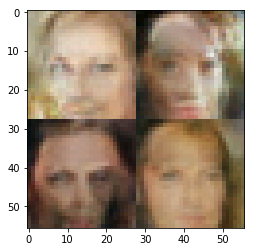

epoch:0 batch: 18820, genarator loss:3.003353, discriminator loss:0.502798
epoch:0 batch: 18840, genarator loss:3.000886, discriminator loss:0.462604
epoch:0 batch: 18860, genarator loss:3.270957, discriminator loss:0.398252
epoch:0 batch: 18880, genarator loss:2.043463, discriminator loss:0.514100
epoch:0 batch: 18900, genarator loss:2.573572, discriminator loss:0.459280
epoch:0 batch: 18920, genarator loss:0.502079, discriminator loss:1.442503
epoch:0 batch: 18940, genarator loss:3.000023, discriminator loss:0.494788
epoch:0 batch: 18960, genarator loss:0.924855, discriminator loss:0.983524
epoch:0 batch: 18980, genarator loss:1.545952, discriminator loss:0.752225
epoch:0 batch: 19000, genarator loss:1.673753, discriminator loss:0.593708


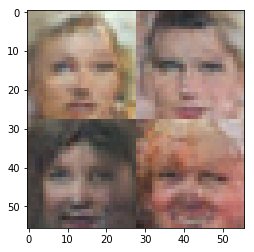

epoch:0 batch: 19020, genarator loss:0.885143, discriminator loss:1.007102
epoch:0 batch: 19040, genarator loss:1.852074, discriminator loss:0.597942
epoch:0 batch: 19060, genarator loss:2.014142, discriminator loss:0.511511
epoch:0 batch: 19080, genarator loss:2.195797, discriminator loss:0.511084
epoch:0 batch: 19100, genarator loss:1.651124, discriminator loss:0.707840
epoch:0 batch: 19120, genarator loss:1.981959, discriminator loss:0.549063
epoch:0 batch: 19140, genarator loss:3.553675, discriminator loss:1.035686
epoch:0 batch: 19160, genarator loss:2.318068, discriminator loss:0.621998
epoch:0 batch: 19180, genarator loss:1.273862, discriminator loss:0.778735
epoch:0 batch: 19200, genarator loss:2.447713, discriminator loss:0.619227


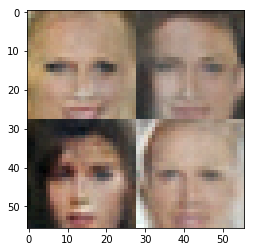

epoch:0 batch: 19220, genarator loss:1.878699, discriminator loss:0.639561
epoch:0 batch: 19240, genarator loss:1.949232, discriminator loss:0.545169
epoch:0 batch: 19260, genarator loss:3.557026, discriminator loss:0.483978
epoch:0 batch: 19280, genarator loss:1.751883, discriminator loss:0.617155
epoch:0 batch: 19300, genarator loss:1.932940, discriminator loss:0.579843
epoch:0 batch: 19320, genarator loss:0.609961, discriminator loss:1.294890
epoch:0 batch: 19340, genarator loss:0.697977, discriminator loss:1.177291


In [ ]:
batch_size = 8
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。